# Loading Data



In [49]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/property_price_data.csv")
data.head()

,Prop_Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,YrSold,SaleCondition,SalePrice
0,PRO504,20,RL,100.0,15537,Pave,NaN,IR1,Lvl,AllPub,...,0,161,0,NaN,GdWo,NaN,0,2010,Normal,288330
1,PRO102,60,RL,77.0,9534,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,2010,Normal,183164
2,PRO609,70,RL,NaN,12781,Pave,NaN,Reg,HLS,AllPub,...,0,0,0,NaN,NaN,NaN,0,2007,Alloca,362145
3,PRO1090,120,FV,37.0,3728,Pave,Pave,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,2006,Normal,196079
4,PRO820,120,RL,44.0,6606,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,2010,Partial,228515


# Data Cleaning and Data Understanding

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Prop_Id        970 non-null    object 
 1   MSSubClass     970 non-null    int64  
 2   MSZoning       970 non-null    object 
 3   LotFrontage    789 non-null    float64
 4   LotArea        970 non-null    int64  
 5   Street         970 non-null    object 
 6   Alley          56 non-null     object 
 7   LotShape       970 non-null    object 
 8   LandContour    970 non-null    object 
 9   Utilities      970 non-null    object 
 10  LotConfig      970 non-null    object 
 11  LandSlope      970 non-null    object 
 12  Neighborhood   970 non-null    object 
 13  Condition1     970 non-null    object 
 14  Condition2     970 non-null    object 
 15  BldgType       970 non-null    object 
 16  PropStyle      970 non-null    object 
 17  OverallQual    970 non-null    int64  
 18  OverallCon

In [51]:
data.shape

(970, 69)

In [52]:
missing_values = data.isnull().sum()
print(missing_values)

Prop_Id            0
MSSubClass         0
MSZoning           0
LotFrontage      181
LotArea            0
                ... 
MiscFeature      941
MiscVal            0
YrSold             0
SaleCondition      0
SalePrice          0
Length: 69, dtype: int64


In [53]:
missing_percentage = (missing_values[missing_values > 0] / len(data)) * 100
print(missing_percentage.sort_values(ascending=False))

PoolQC          99.278351
MiscFeature     97.010309
Alley           94.226804
Fence           82.577320
FireplaceQu     45.051546
LotFrontage     18.659794
GarageQual       5.360825
GarageFinish     5.360825
GarageYrBlt      5.360825
GarageType       5.360825
GarageCond       5.360825
BsmtExposure     2.474227
BsmtQual         2.371134
BsmtCond         2.371134
dtype: float64


In [54]:
numerical_cols_with_missing = []
categorical_cols_with_missing = []

for col in missing_percentage.index:
    if data[col].dtype in ['int64', 'float64']:
        numerical_cols_with_missing.append(col)
    else:
        categorical_cols_with_missing.append(col)

print(numerical_cols_with_missing)
print(categorical_cols_with_missing)

['LotFrontage', 'GarageYrBlt']
['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [55]:
for col in numerical_cols_with_missing:
    median_val = data[col].median()
    data[col] = data[col].fillna(median_val)

In [56]:
for col in categorical_cols_with_missing:
    mode_val = data[col].mode()[0]
    data[col] = data[col].fillna(mode_val)

In [57]:
data.isnull().sum().sum()

np.int64(0)

In [58]:
data.duplicated().sum()

np.int64(0)

# EDA

In [59]:
numerical_cols = data.select_dtypes("int64","float64").columns
print(data[numerical_cols].describe())

       MSSubClass        LotArea  OverallQual  OverallCond    YearBuilt  \
count  970.000000     970.000000   970.000000   970.000000   970.000000   
mean    58.092784   11208.956701     6.143299     5.547423  1971.496907   
std     42.962071   10153.538896     1.396990     1.091443    30.247798   
min     20.000000    1663.000000     1.000000     1.000000  1875.000000   
25%     20.000000    8147.500000     5.000000     5.000000  1954.000000   
50%     50.000000   10174.500000     6.000000     5.000000  1974.000000   
75%     70.000000   12482.250000     7.000000     6.000000  2000.000000   
max    190.000000  216301.000000    10.000000     9.000000  2009.000000   

       YearRemodAdd  TotalBsmtSF    GrLivArea  BsmtFullBath  BsmtHalfBath  \
count    970.000000   970.000000   970.000000    970.000000    970.000000   
mean    1984.741237  1079.728866  1532.874227      0.437113      0.060825   
std       20.659310   463.970814   546.642210      0.518655      0.247613   
min     1950.000

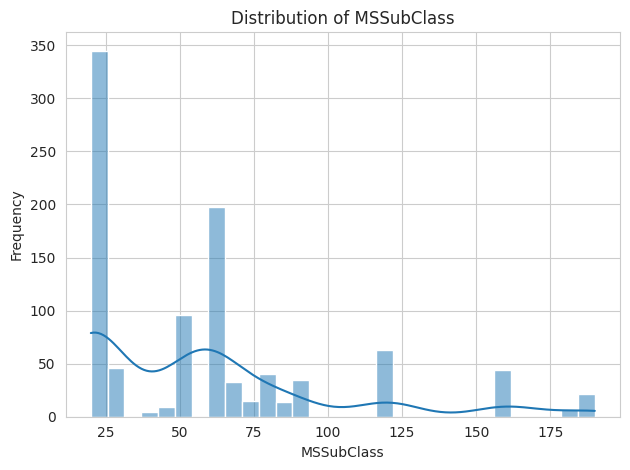

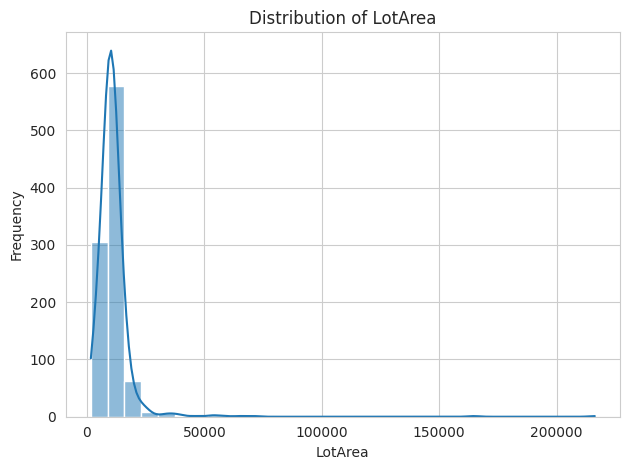

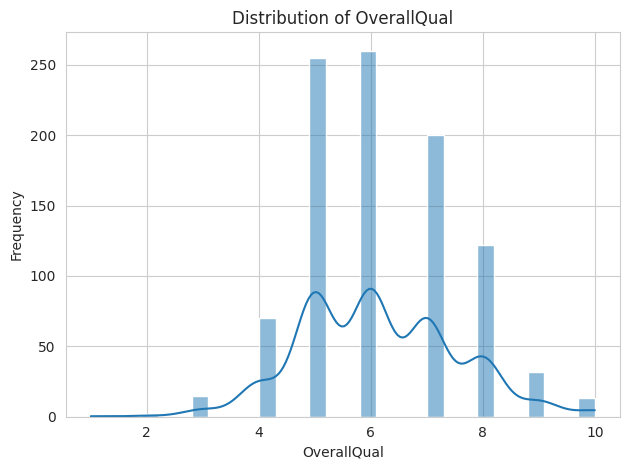

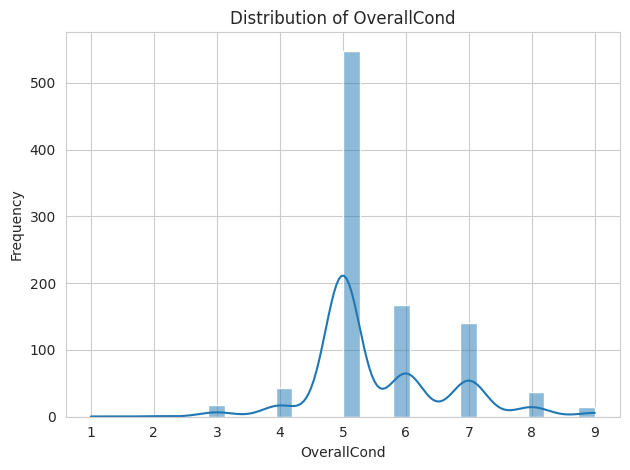

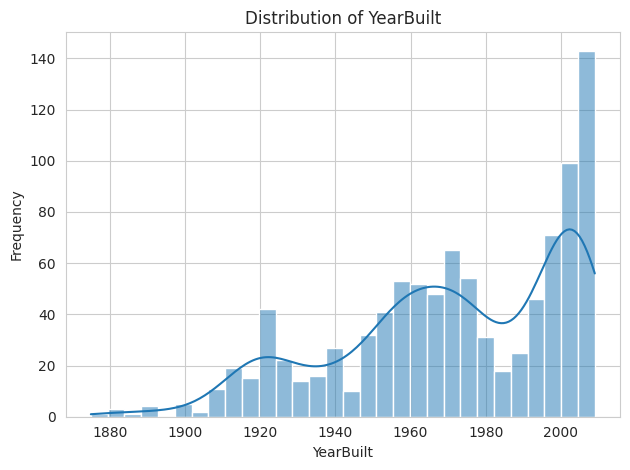

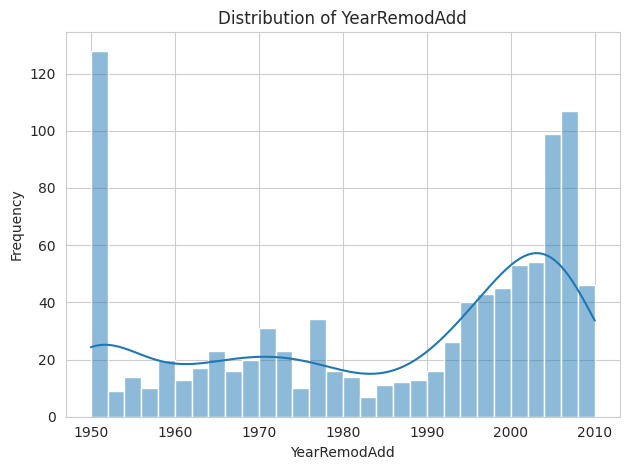

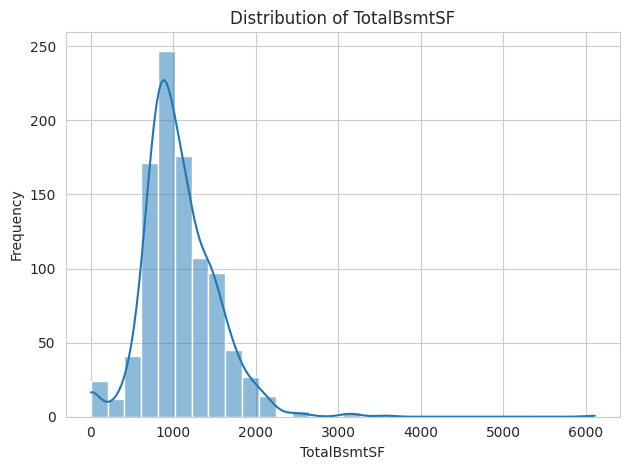

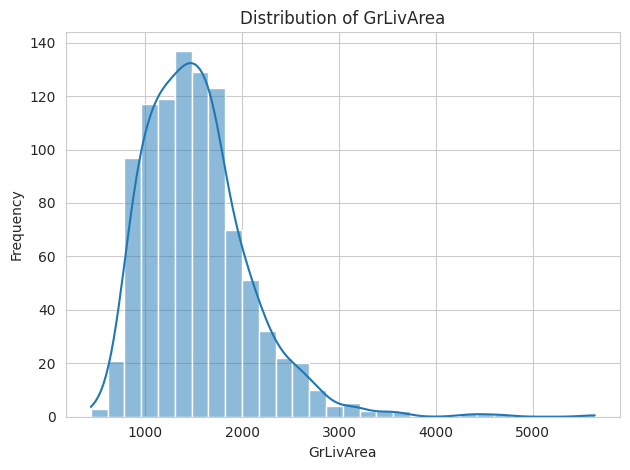

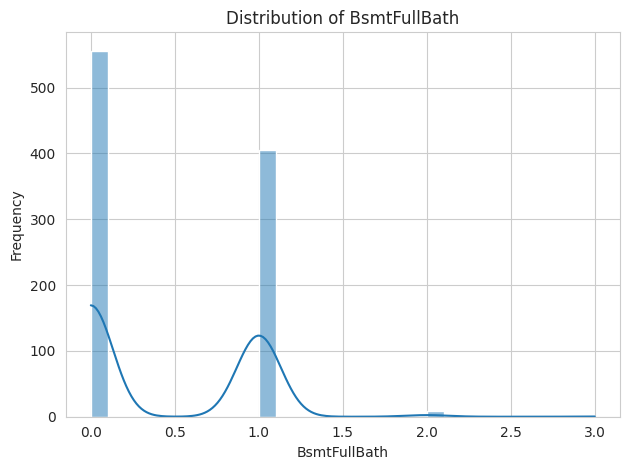

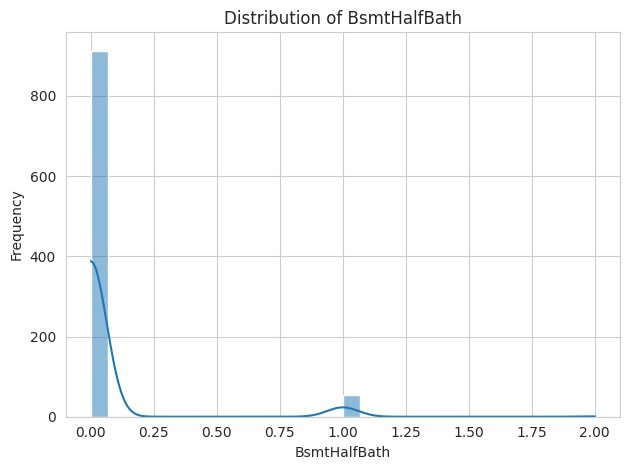

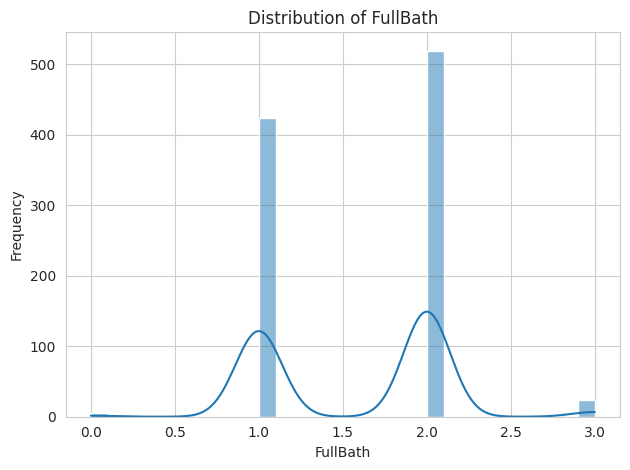

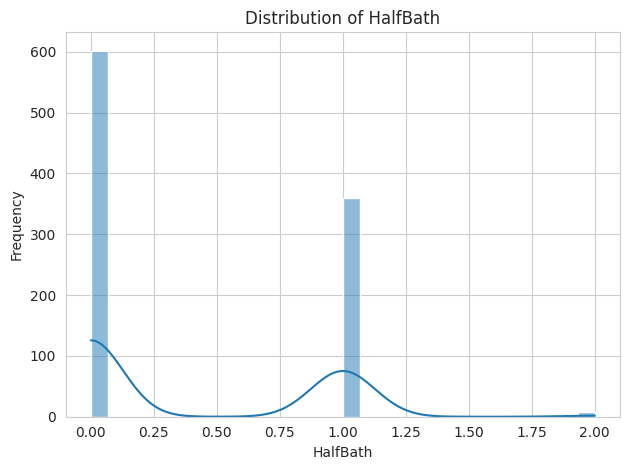

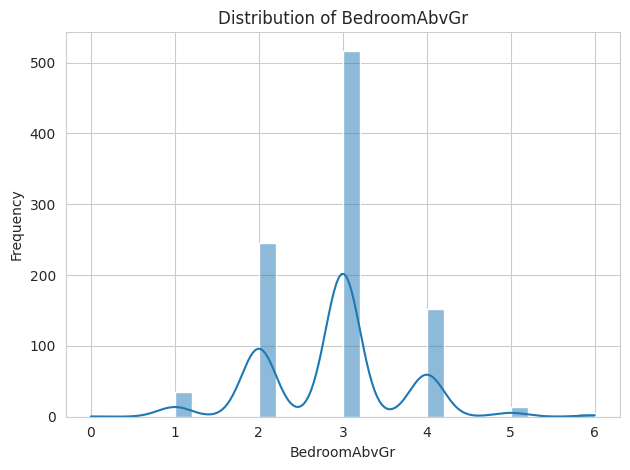

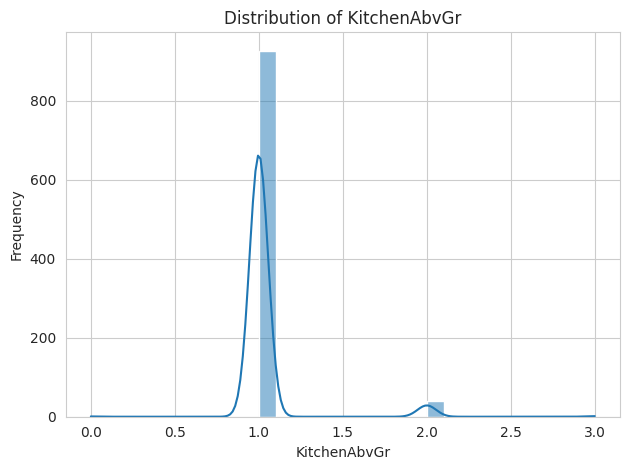

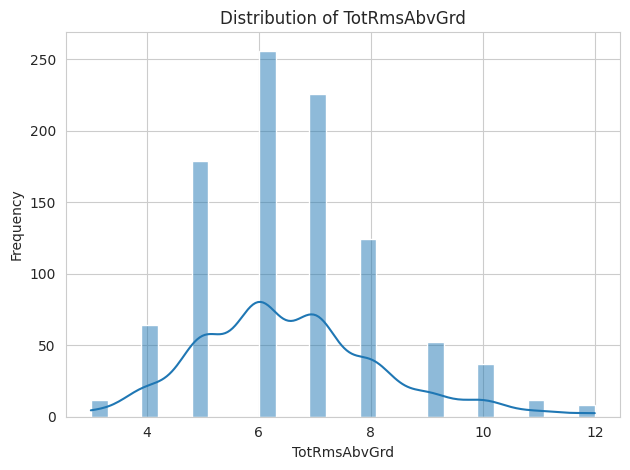

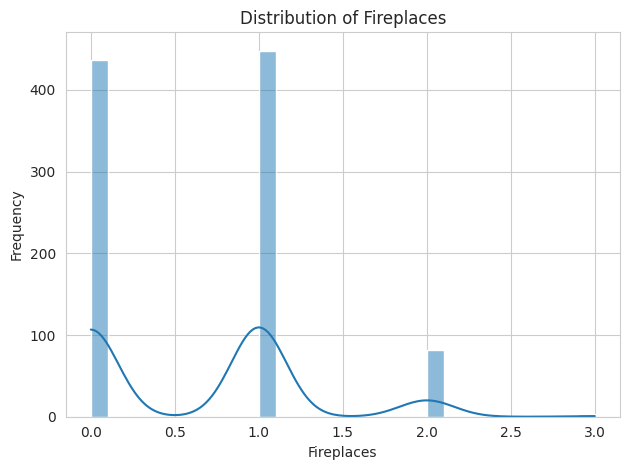

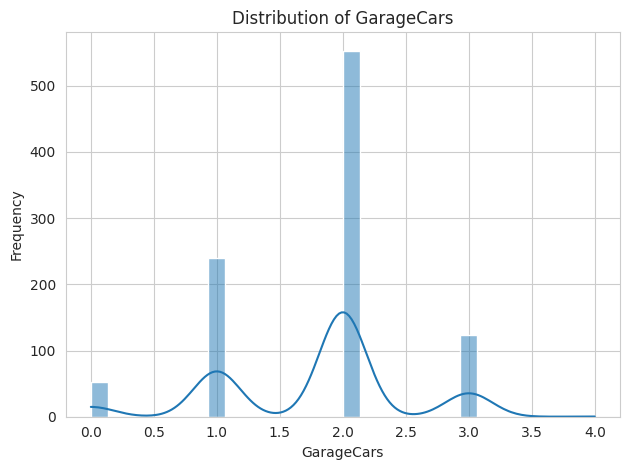

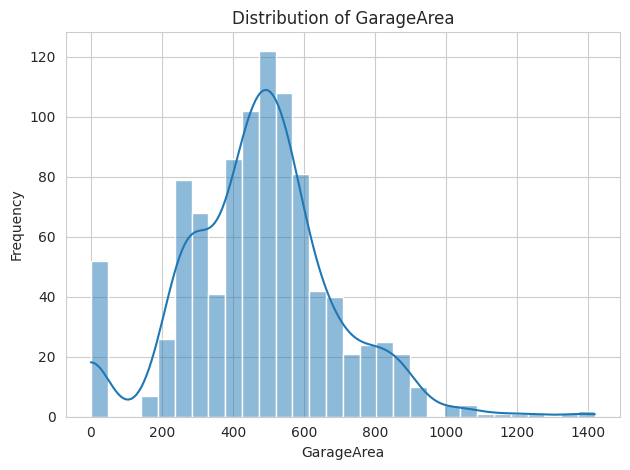

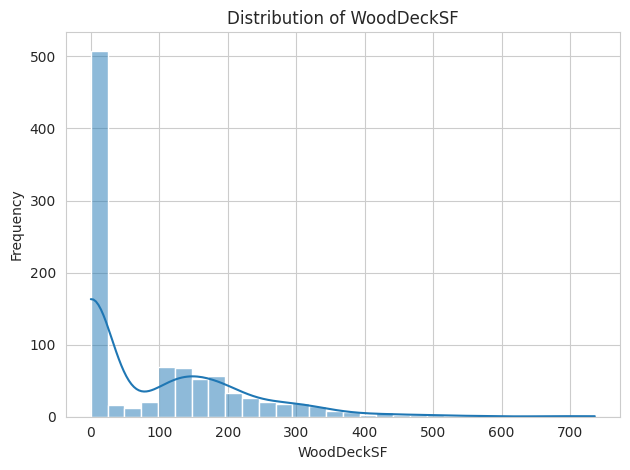

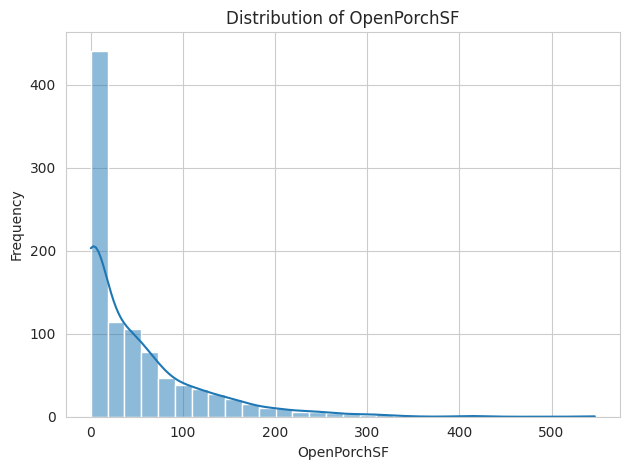

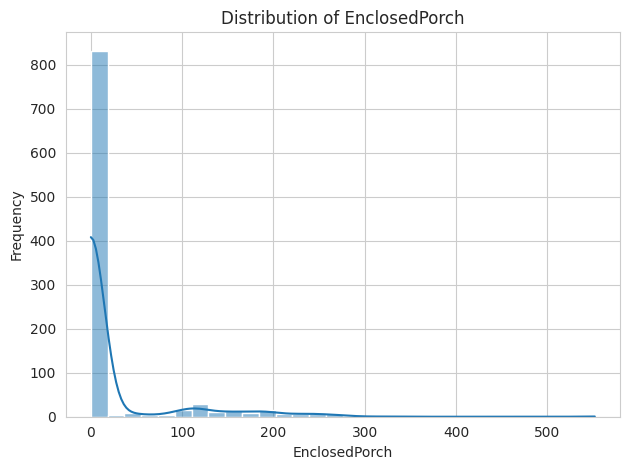

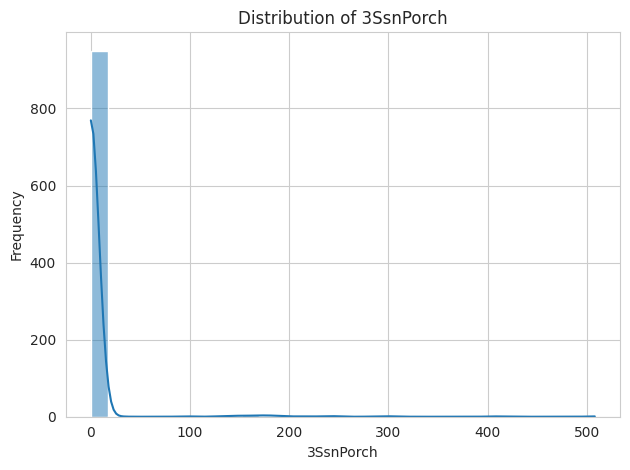

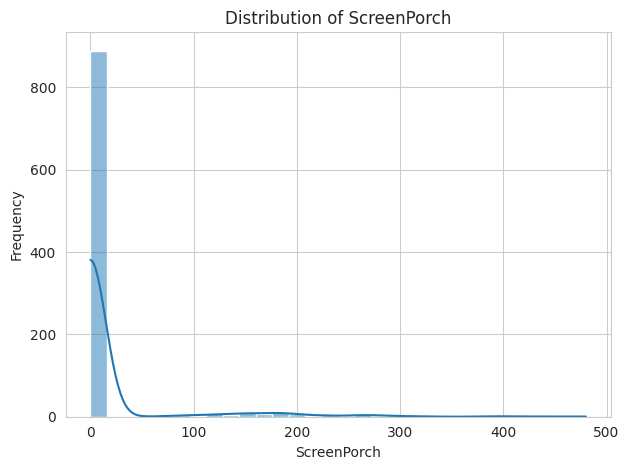

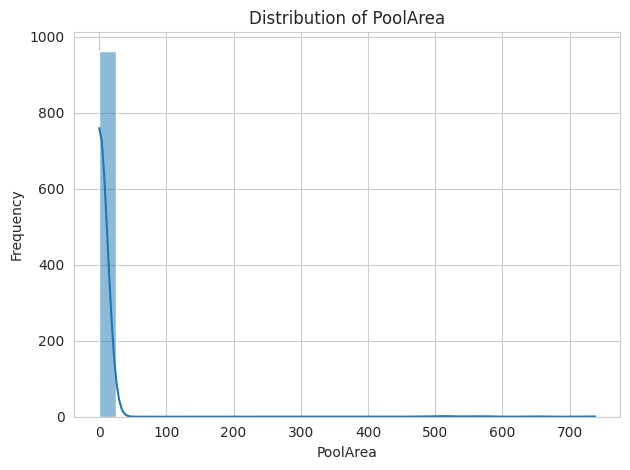

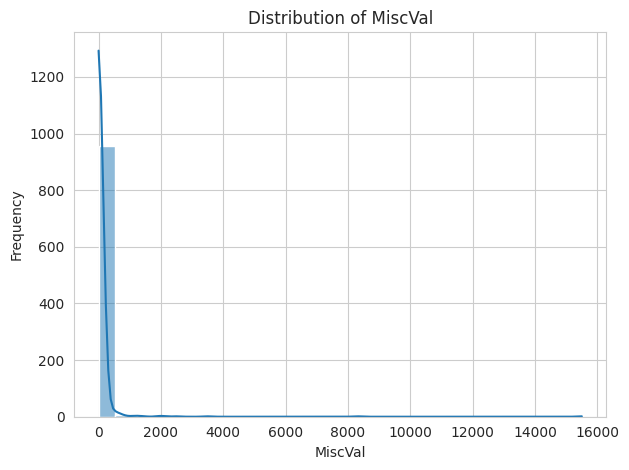

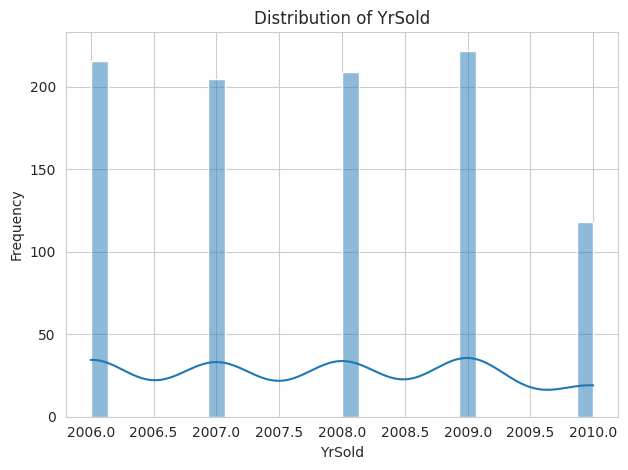

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = data.select_dtypes("int64","float64").columns.drop(['Prop_Id', 'SalePrice'], errors='ignore')

for col in numerical_cols:
    # Histogram
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [61]:
categorical_cols = data.select_dtypes('object').columns
print(data[categorical_cols].describe())

        Prop_Id MSZoning Street Alley LotShape LandContour Utilities  \
count       970      970    970   970      970         970       970   
unique      970        5      2     2        4           4         2   
top     PRO1032       RL   Pave  Grvl      Reg         Lvl    AllPub   
freq          1      753    965   946      605         865       969   

       LotConfig LandSlope Neighborhood  ... FireplaceQu GarageType  \
count        970       970          970  ...         970        970   
unique         5         3           25  ...           5          6   
top       Inside       Gtl        NAmes  ...          Gd     Attchd   
freq         699       913          140  ...         703        626   

       GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence  \
count           970        970        970        970    970    970   
unique            3          5          5          3      3      4   
top             Unf         TA         TA          Y     Gd  MnPrv   
fre

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


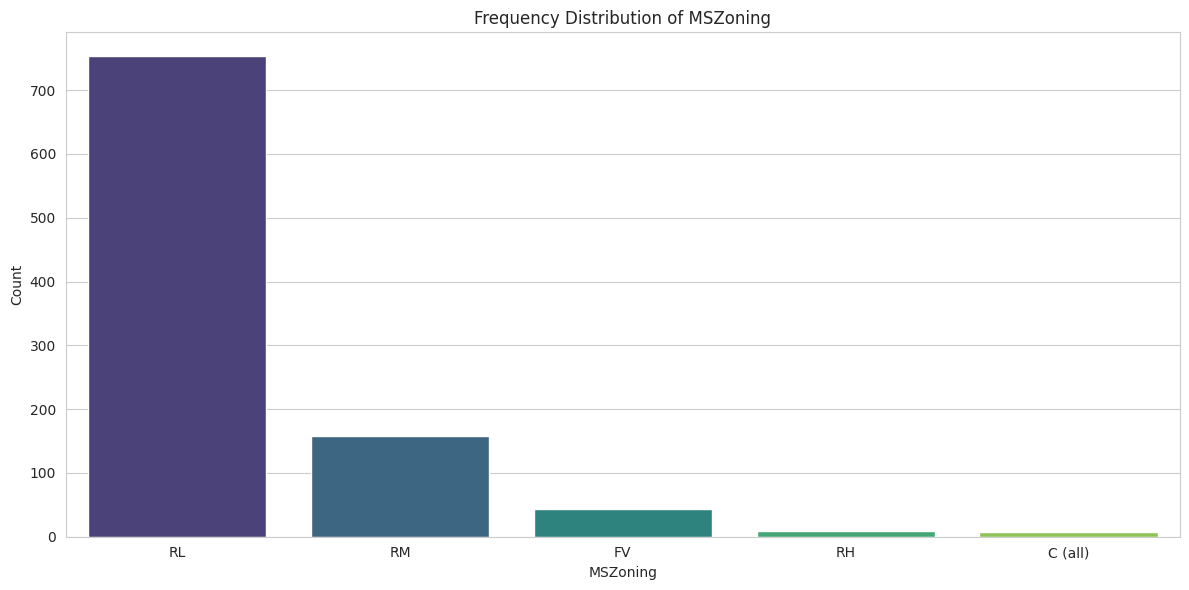

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


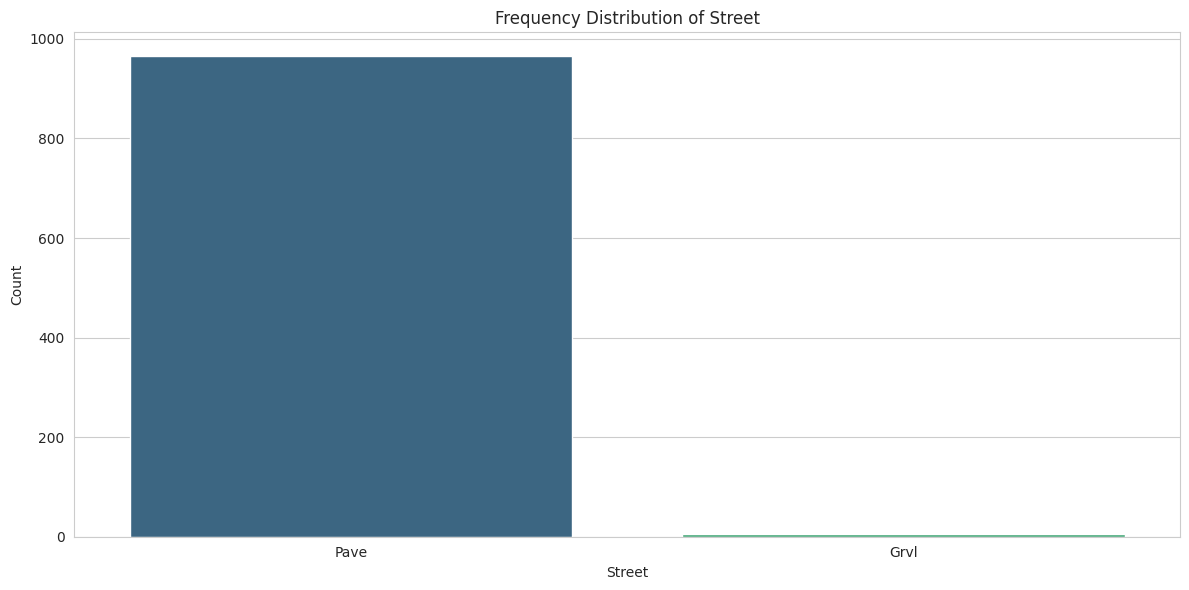

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


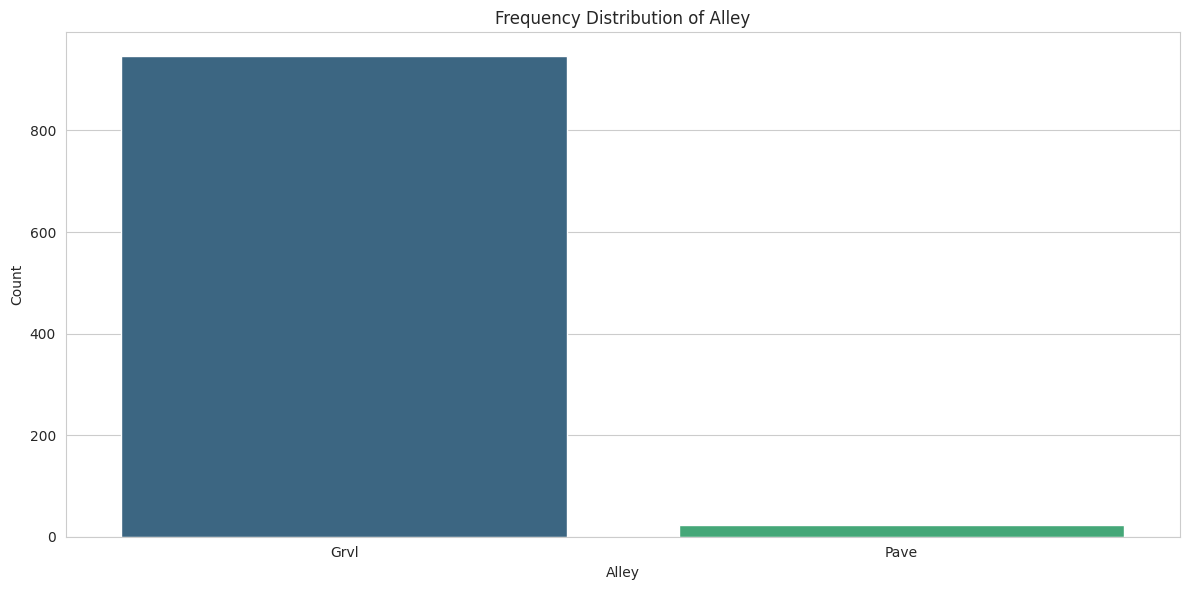

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


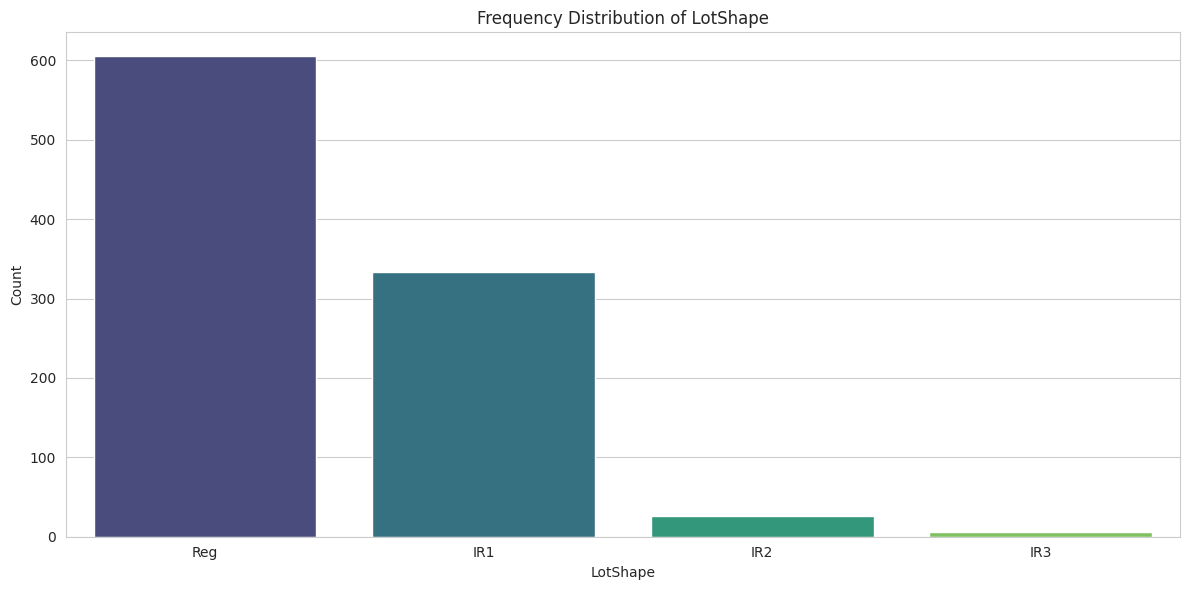

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


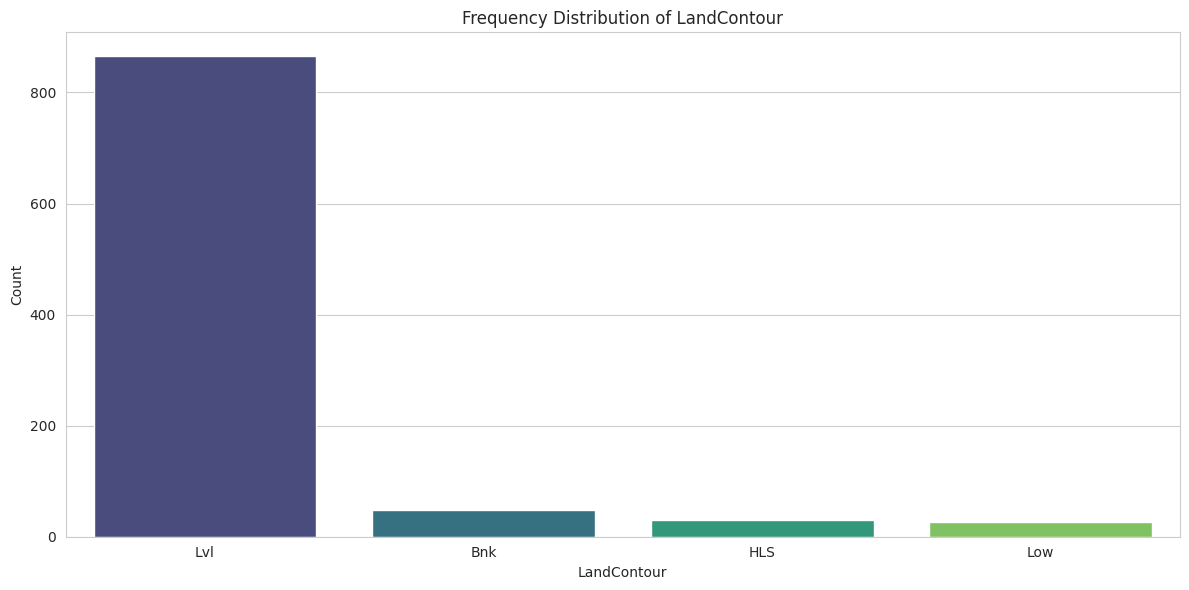

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


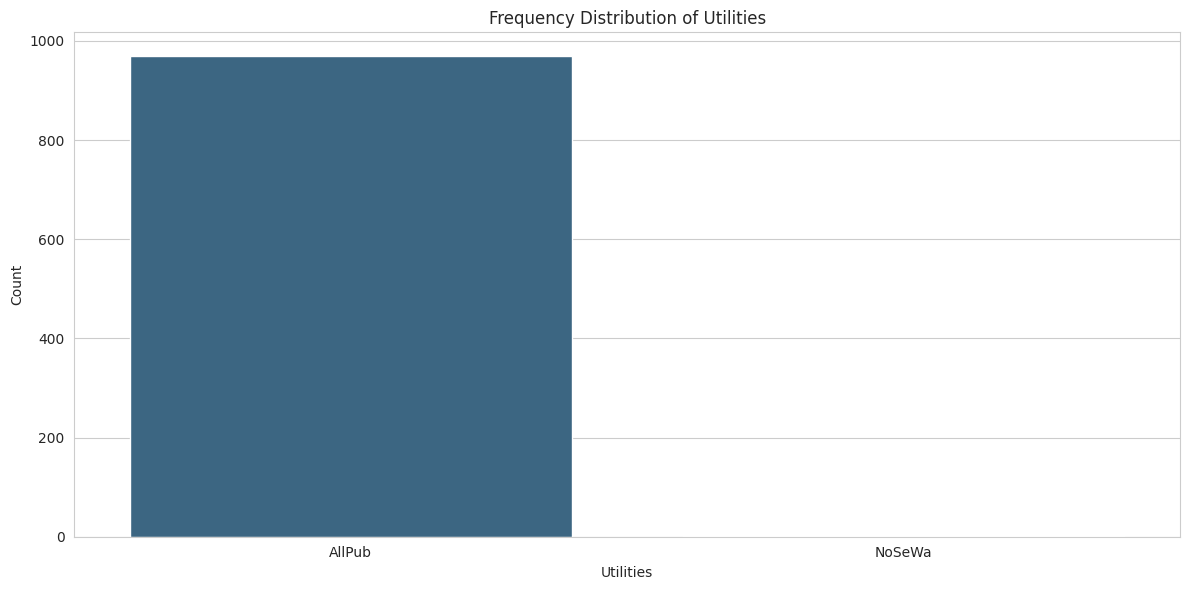

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


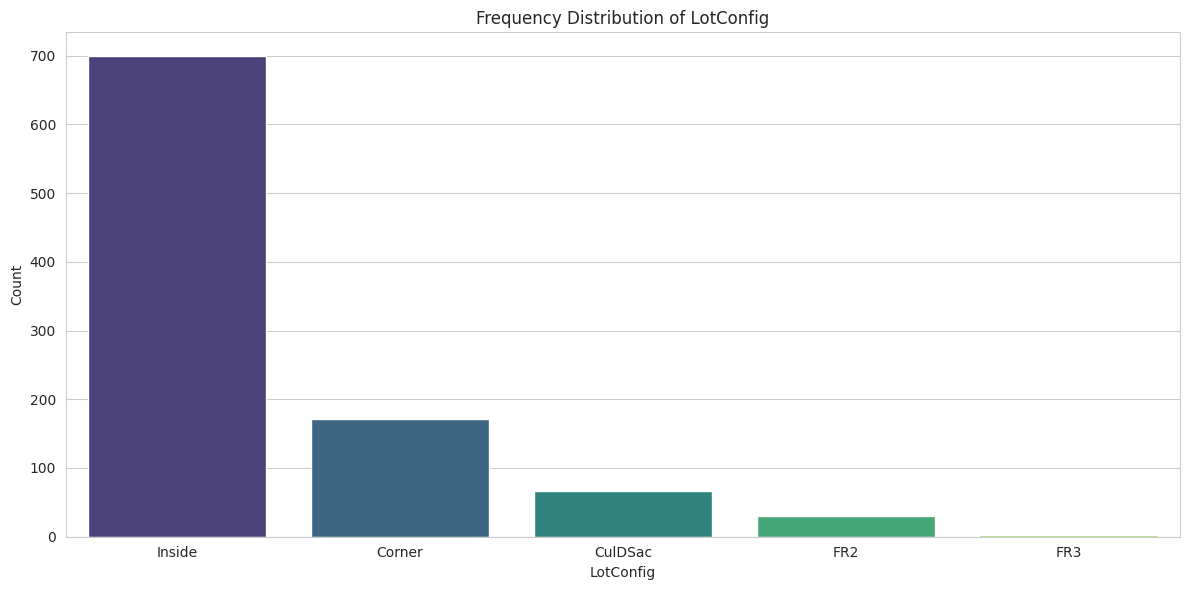

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


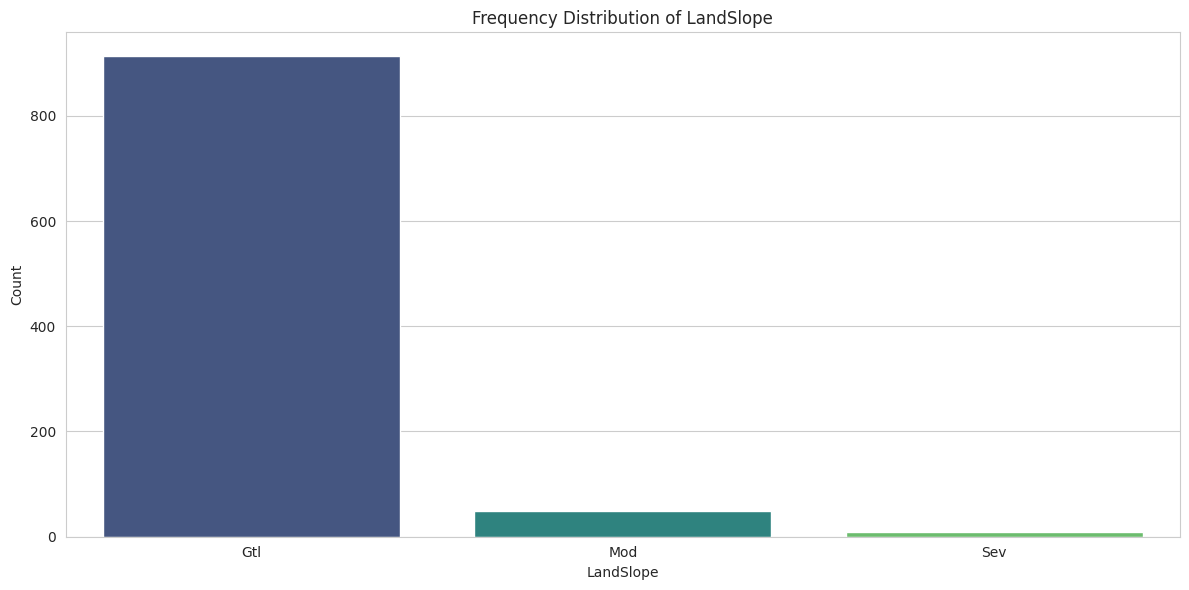

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


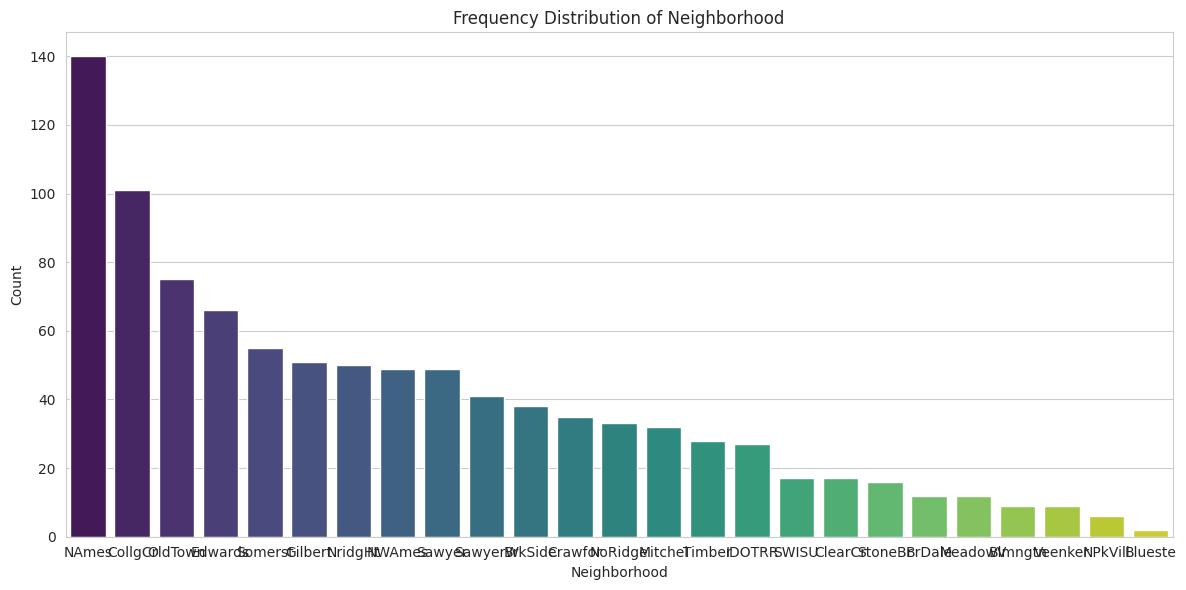

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


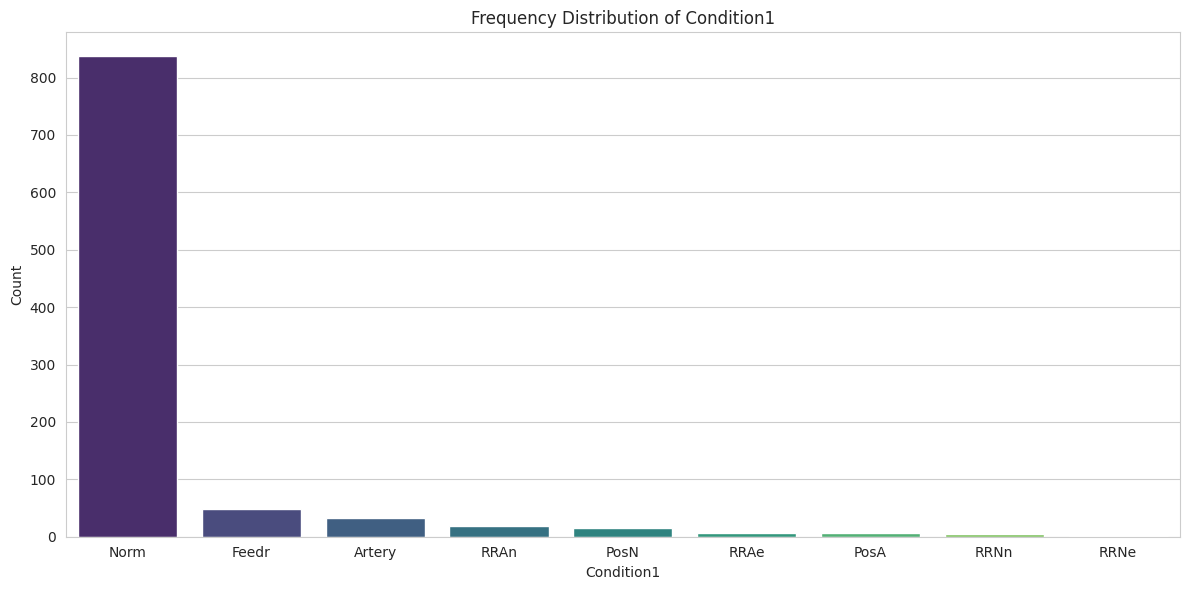

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


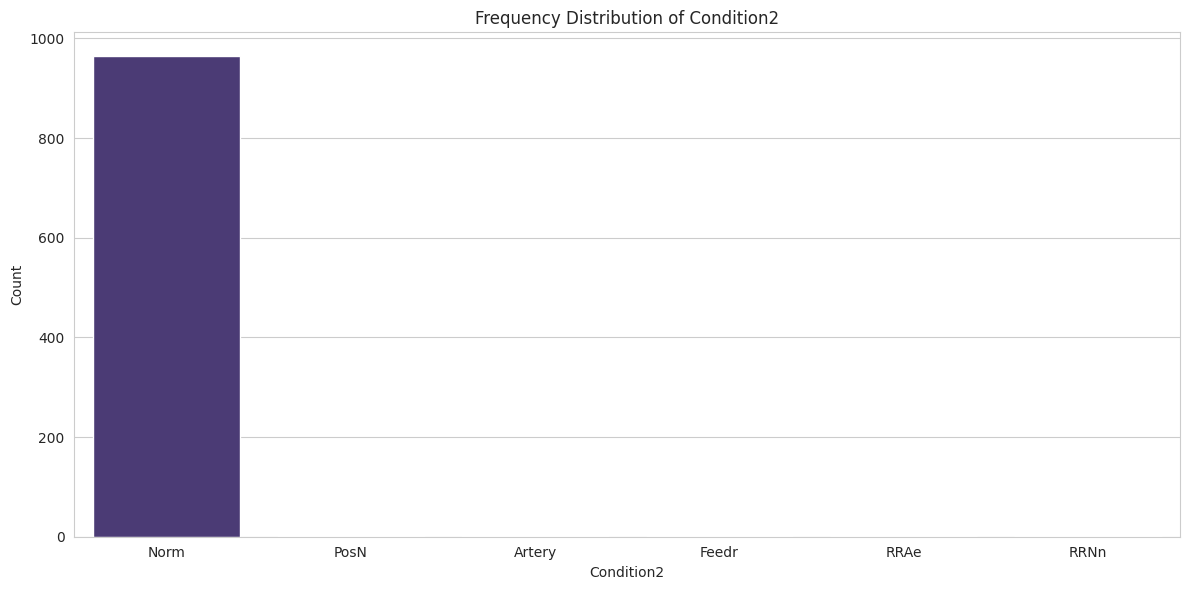

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


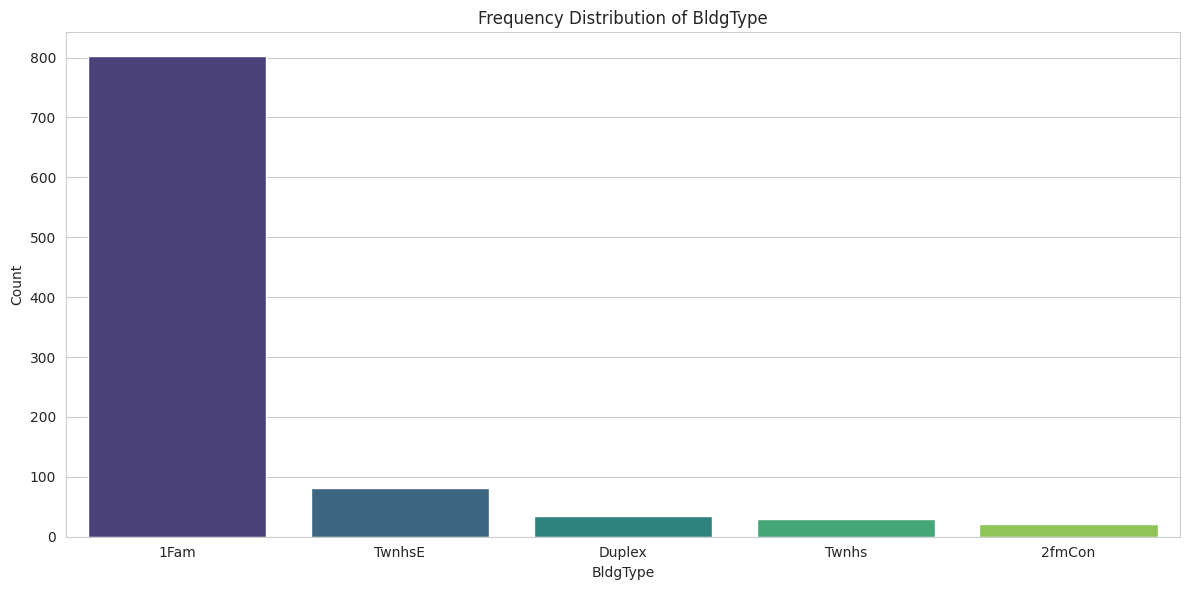

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


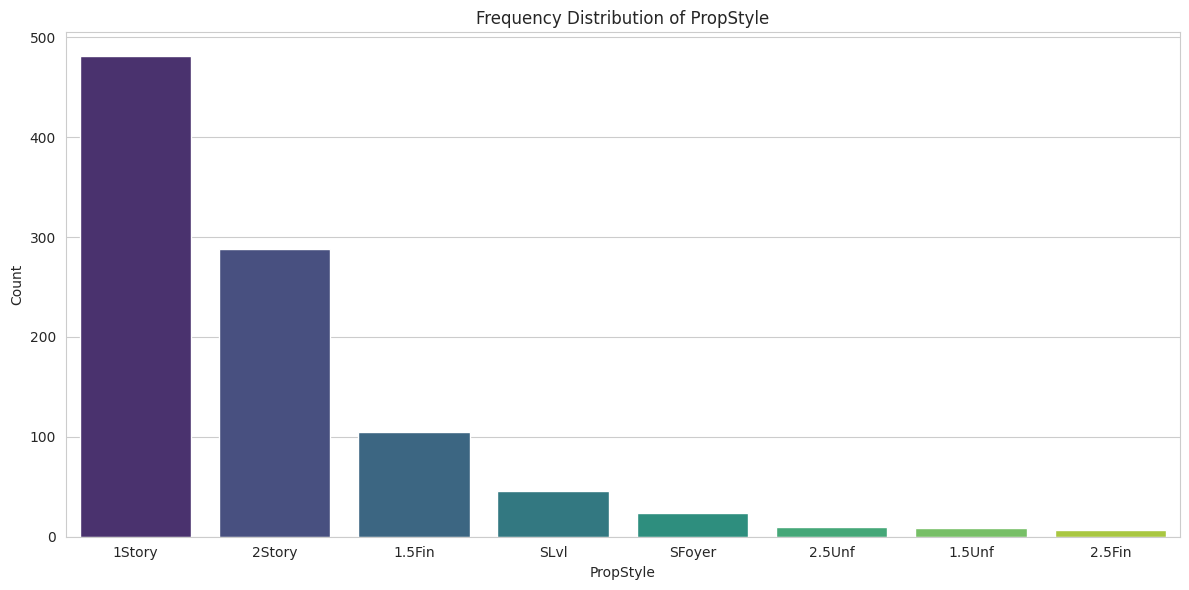

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


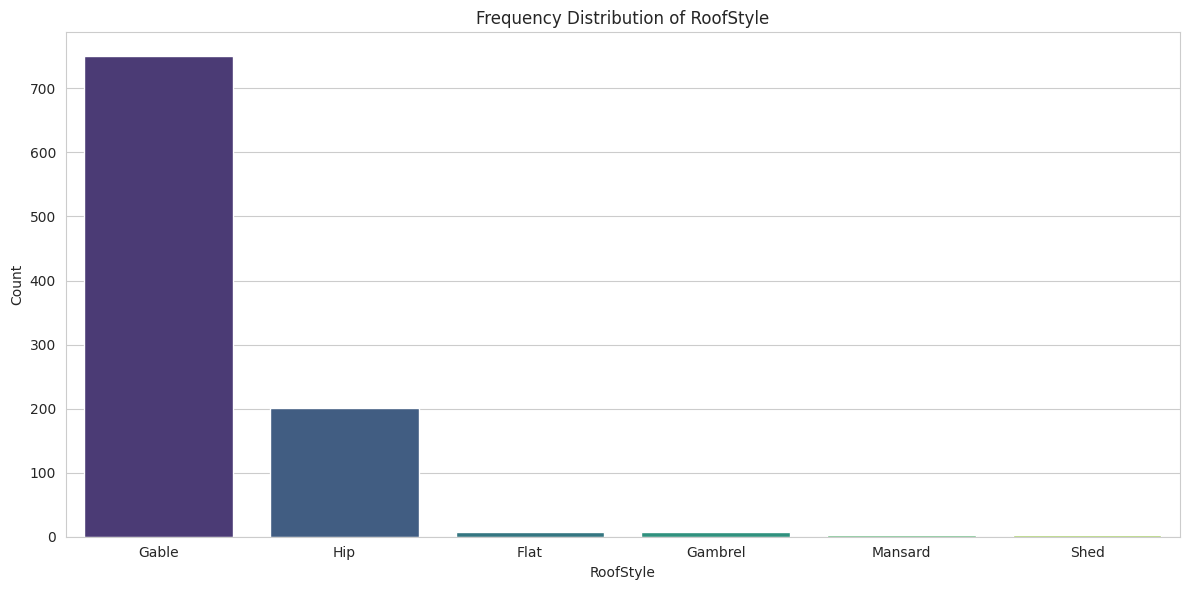

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


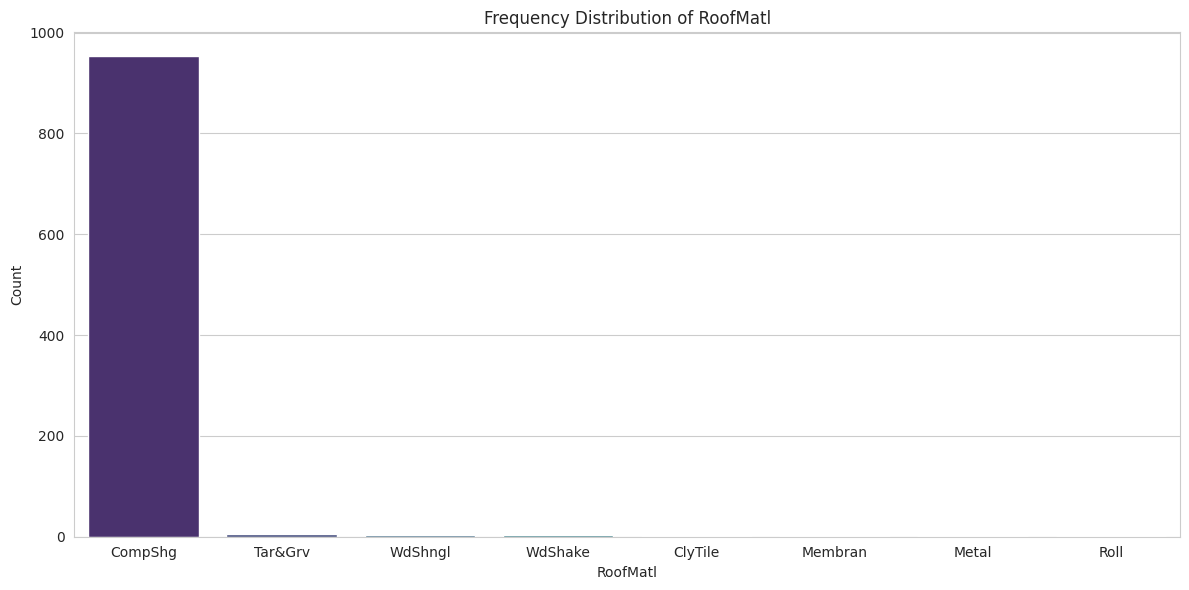

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


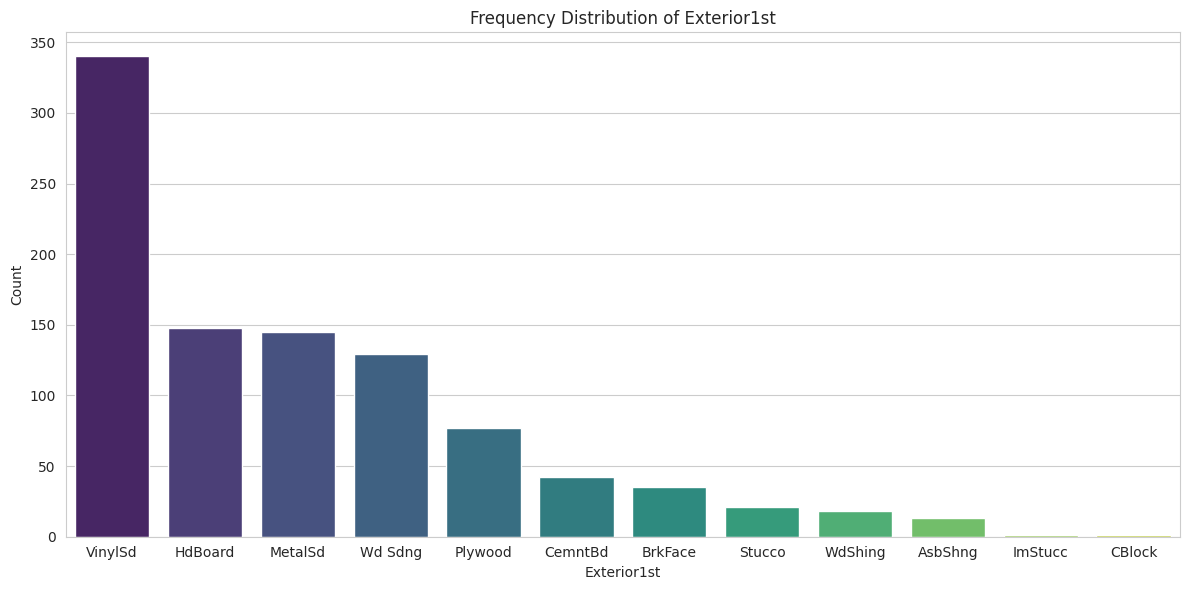

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


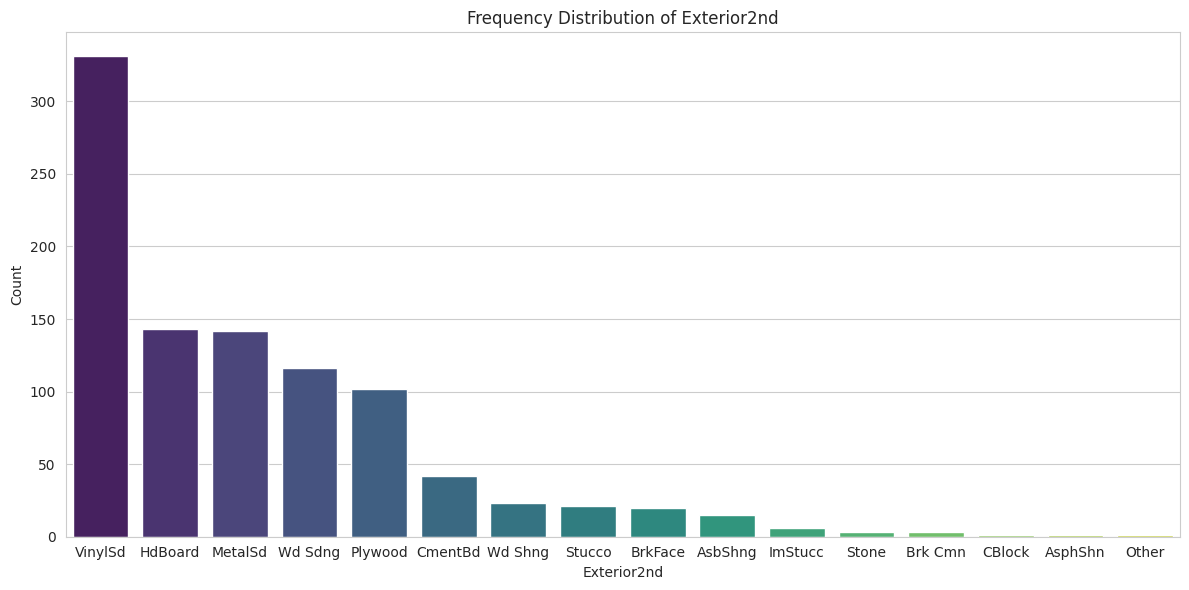

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


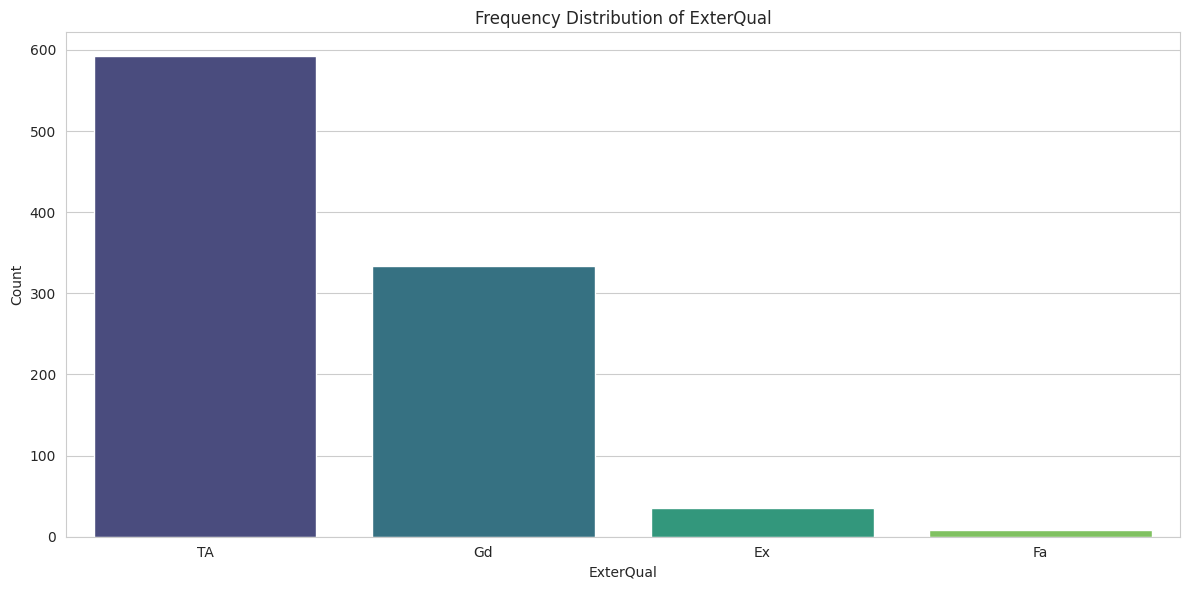

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


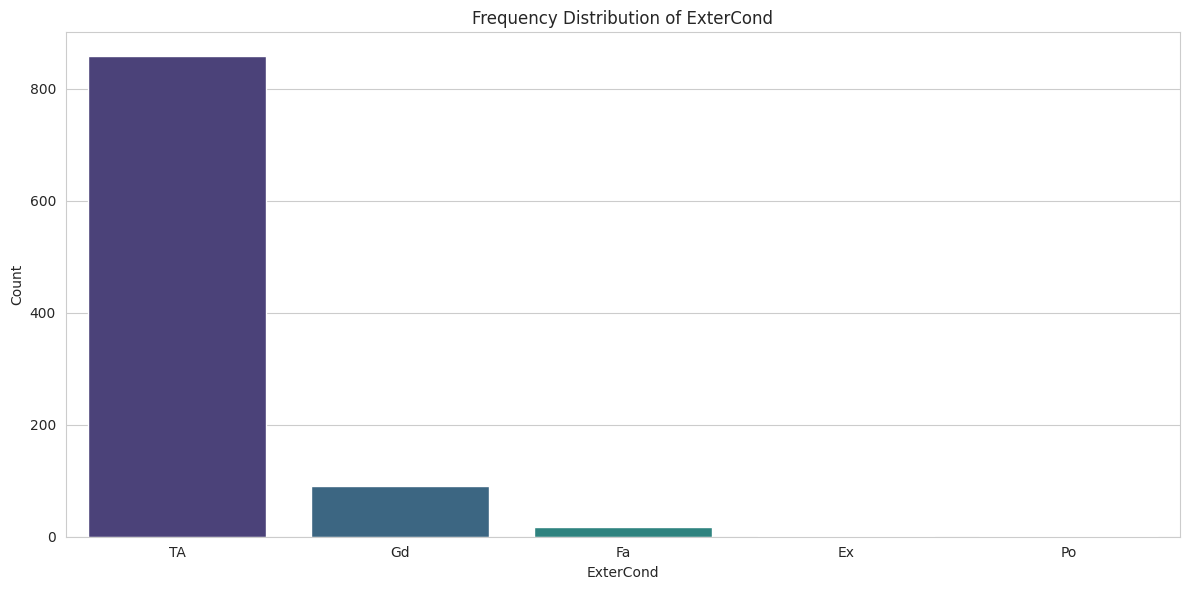

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


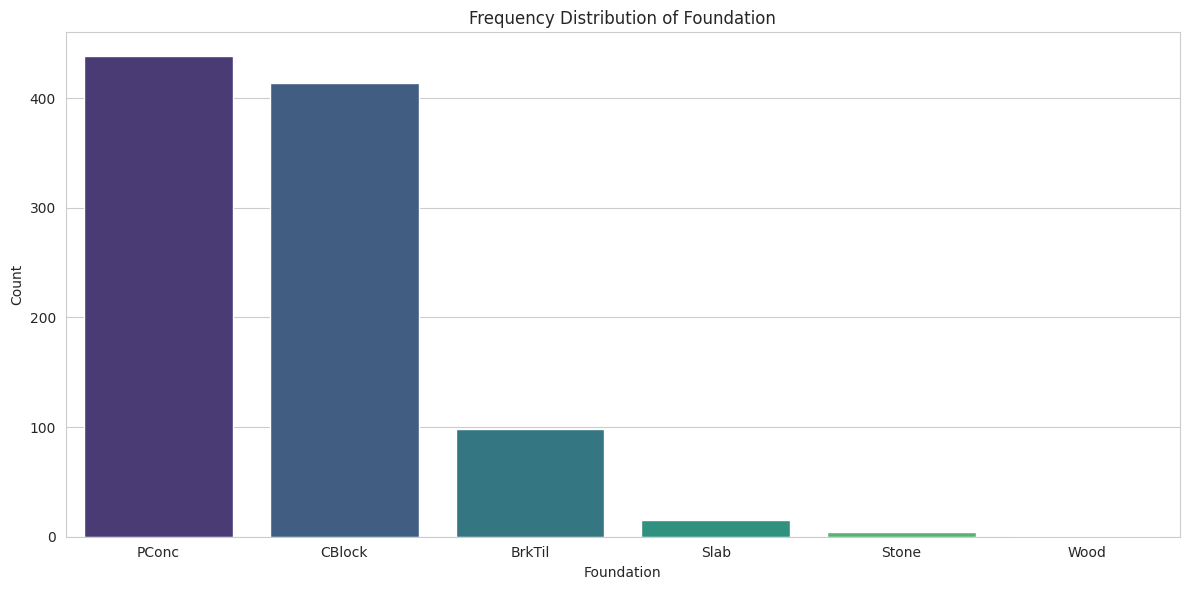

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


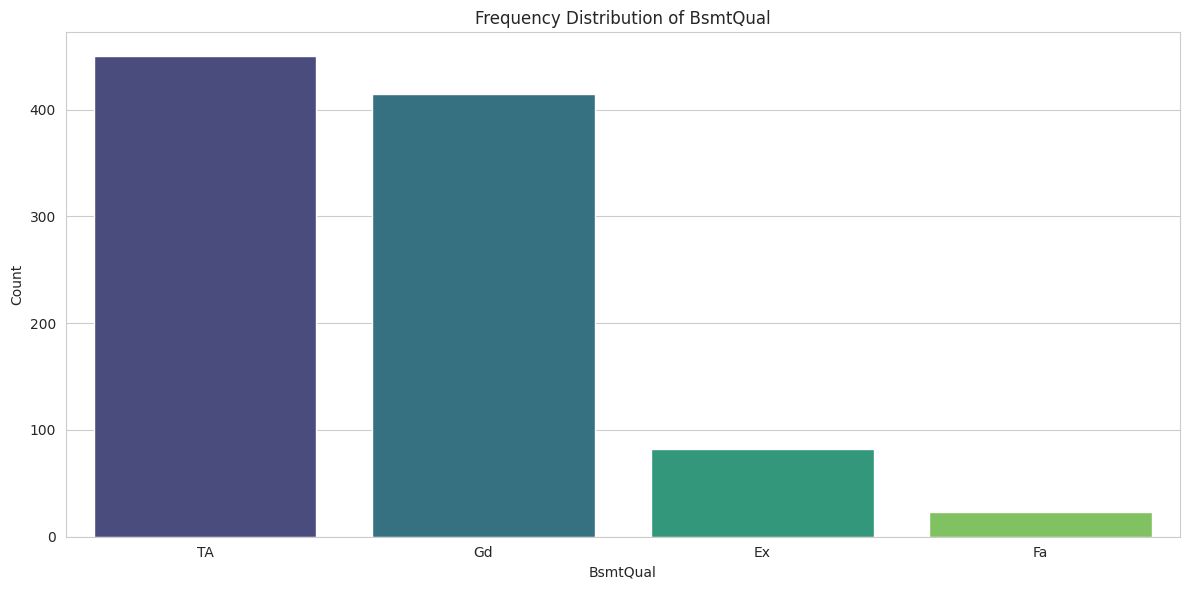

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


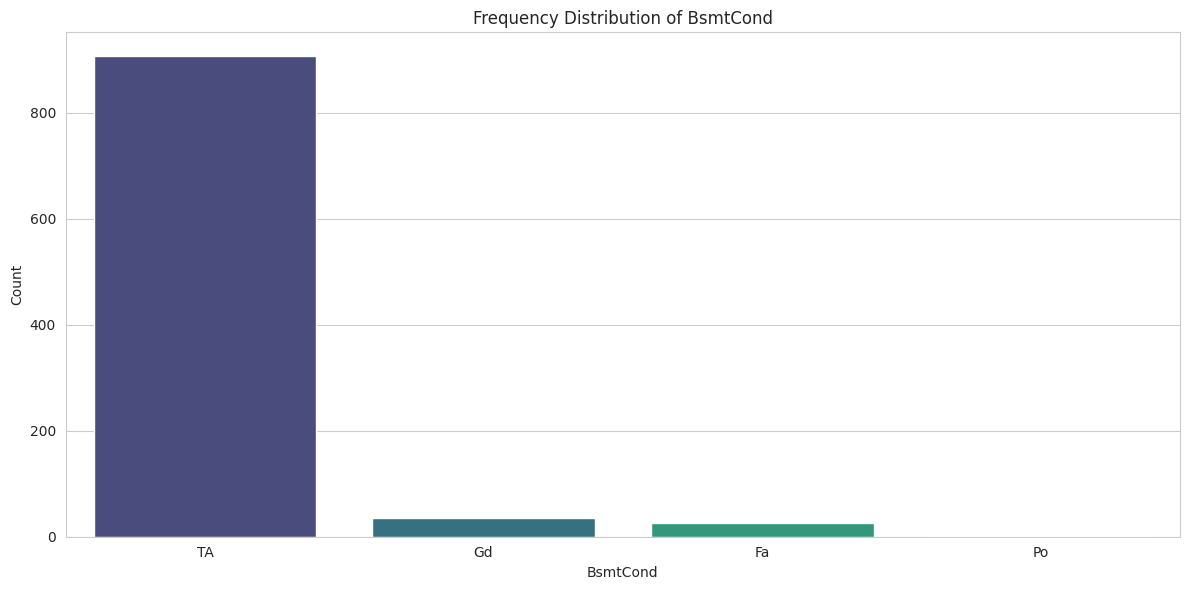

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


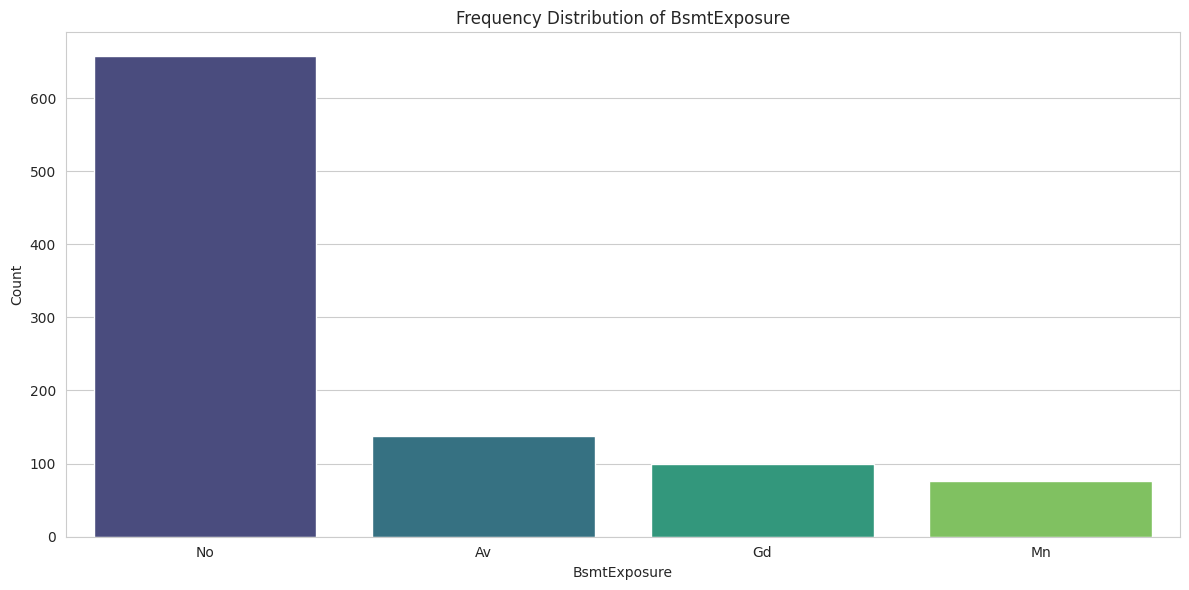

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


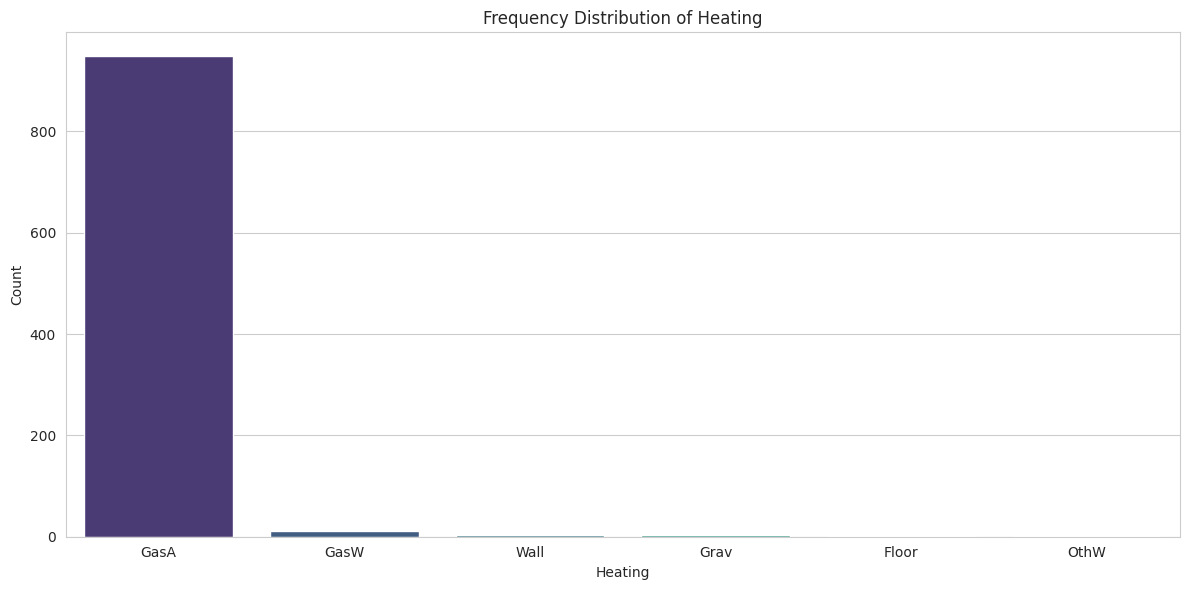

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


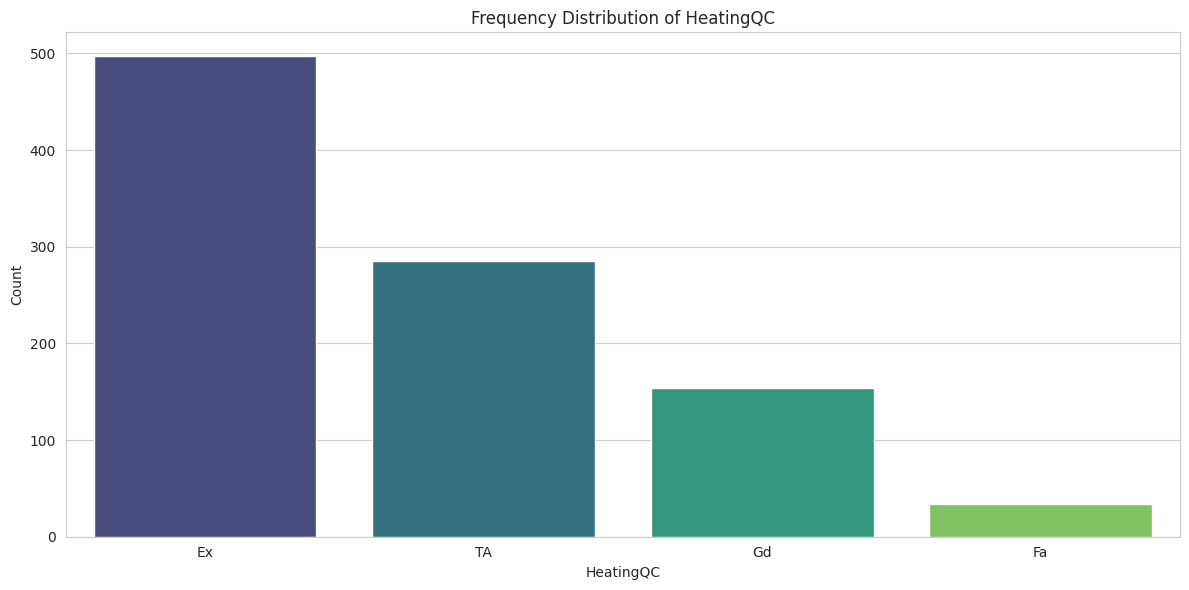

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


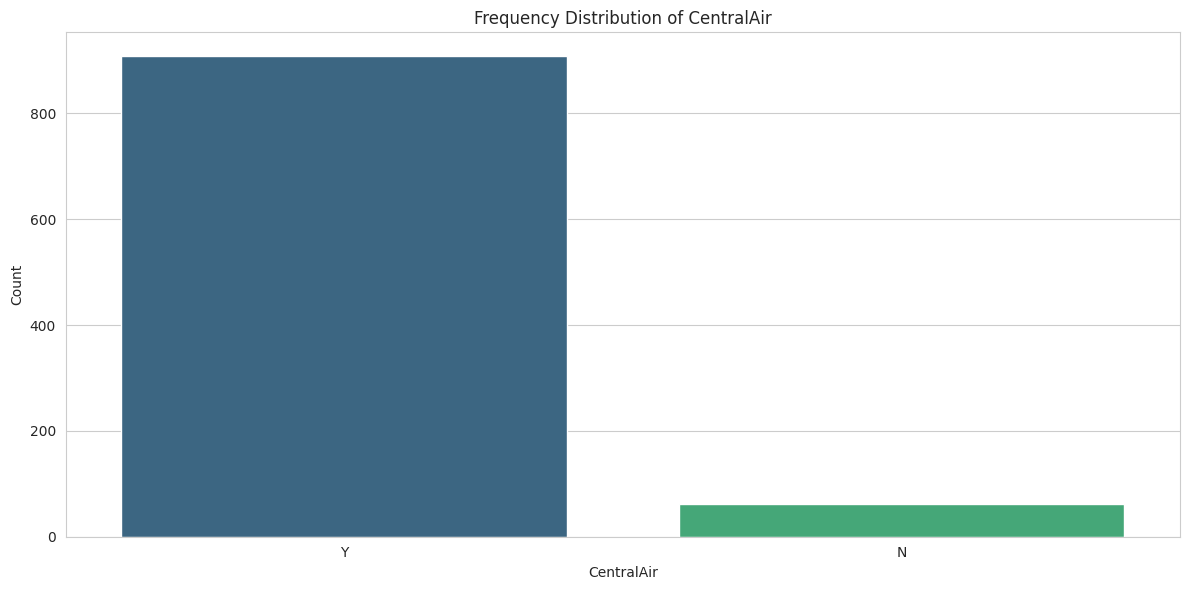

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


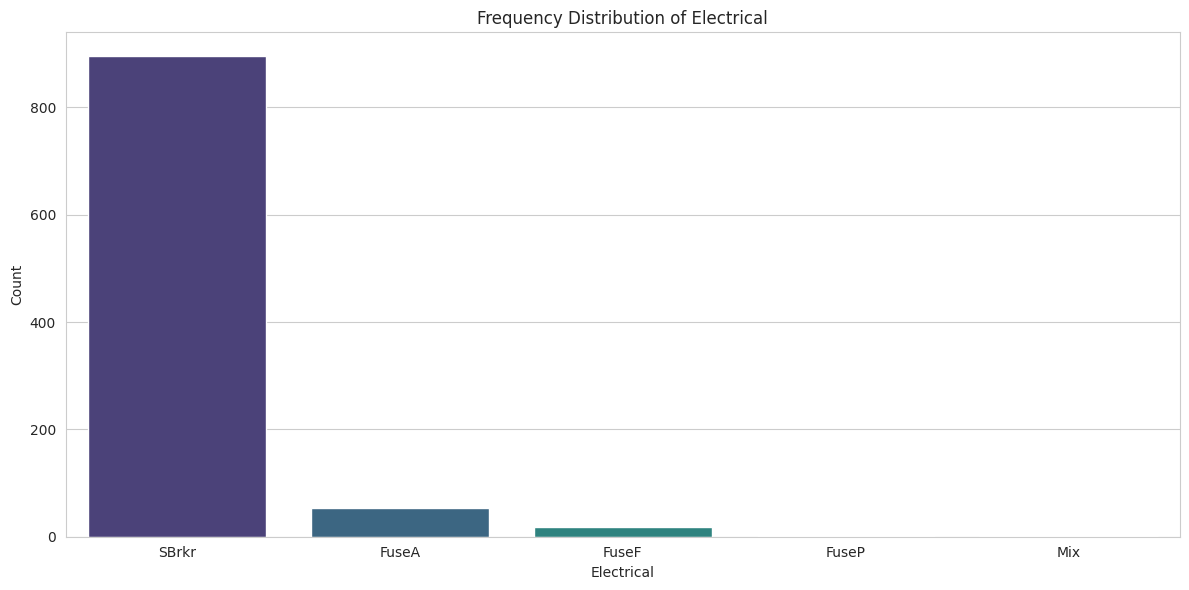

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


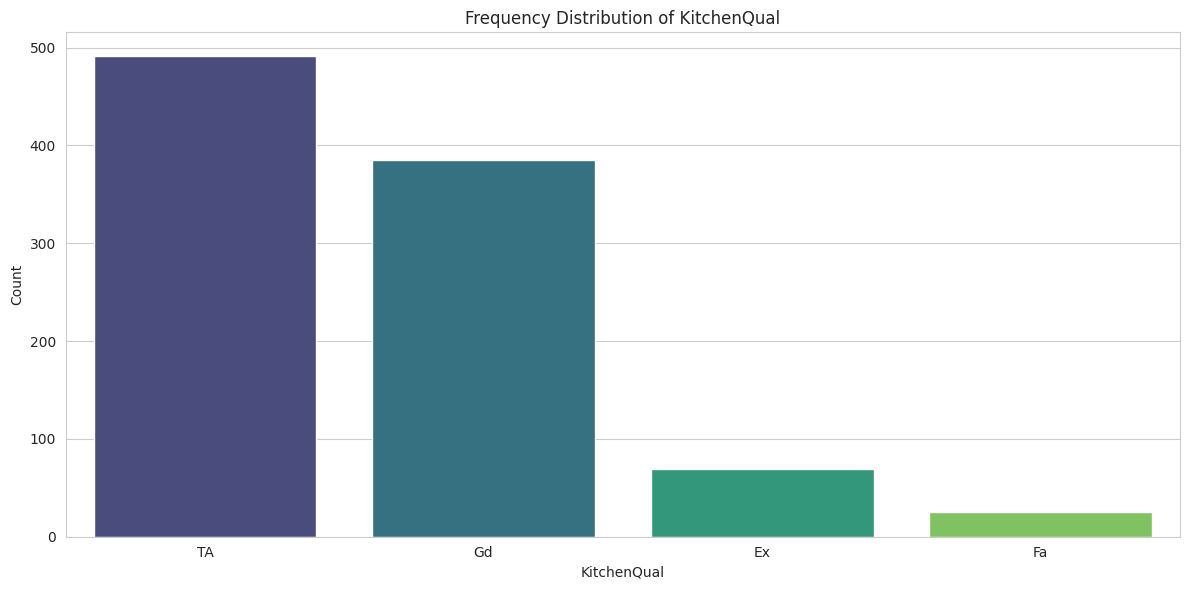

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


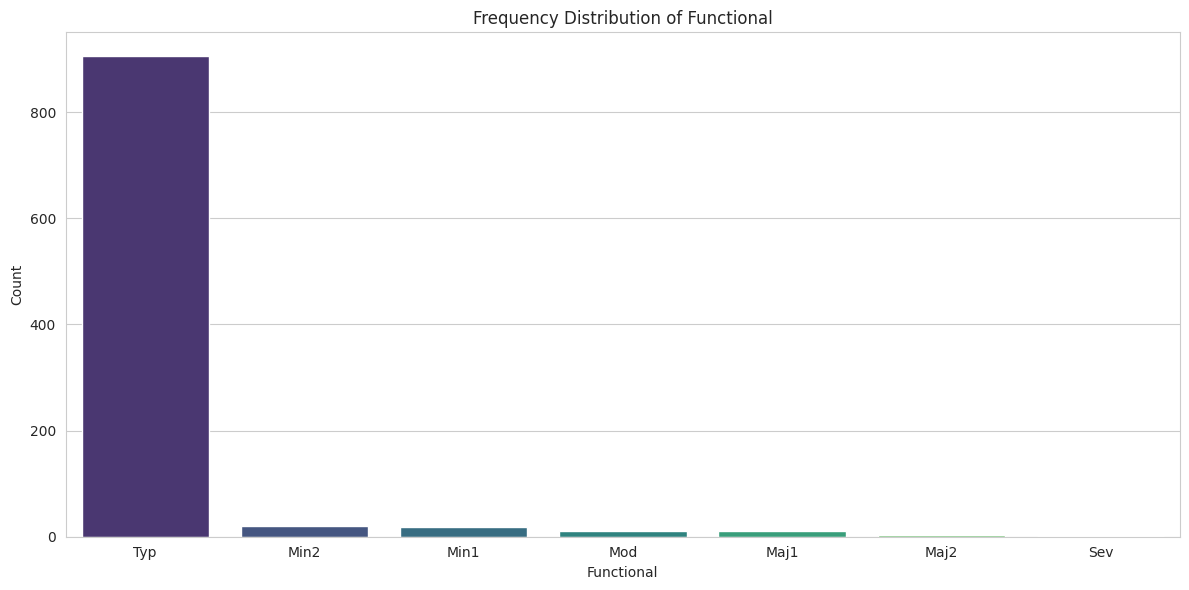

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


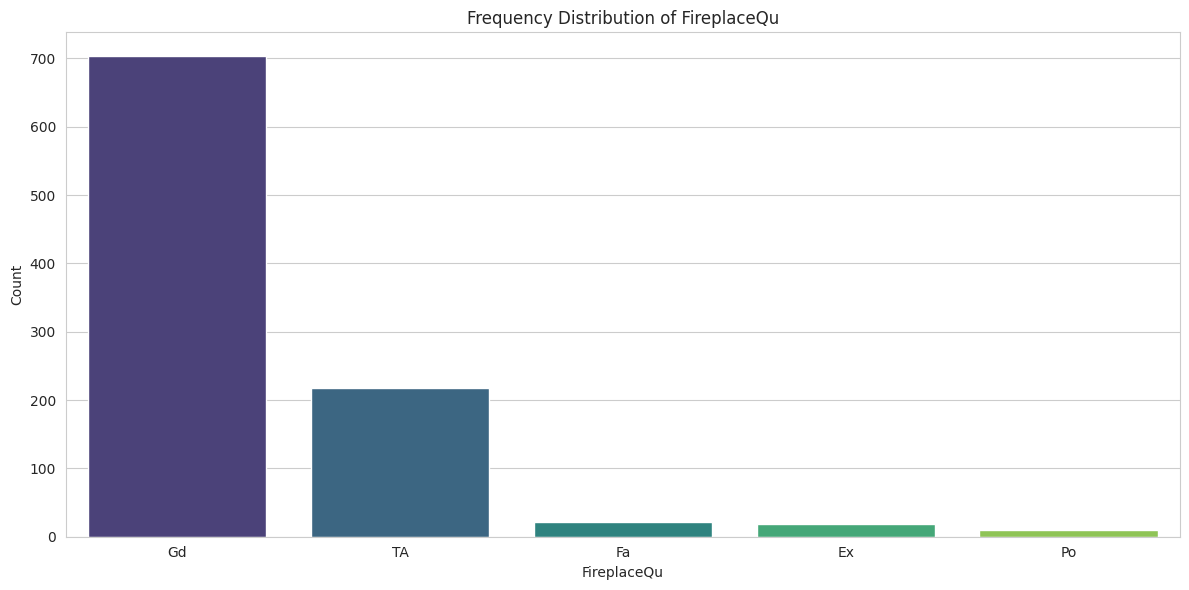

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


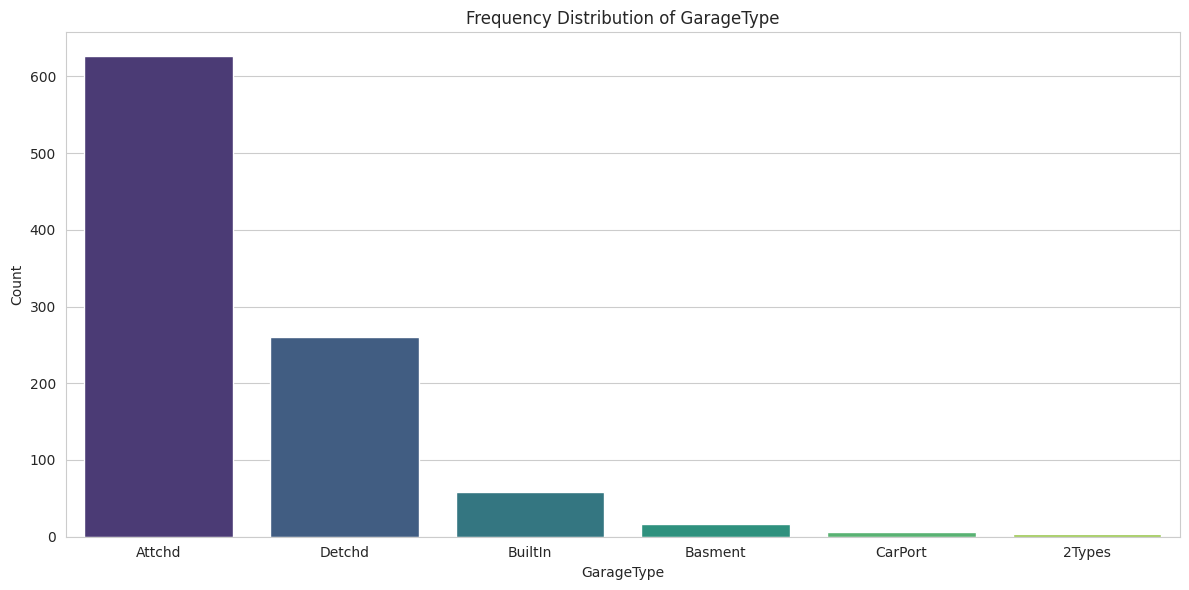

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


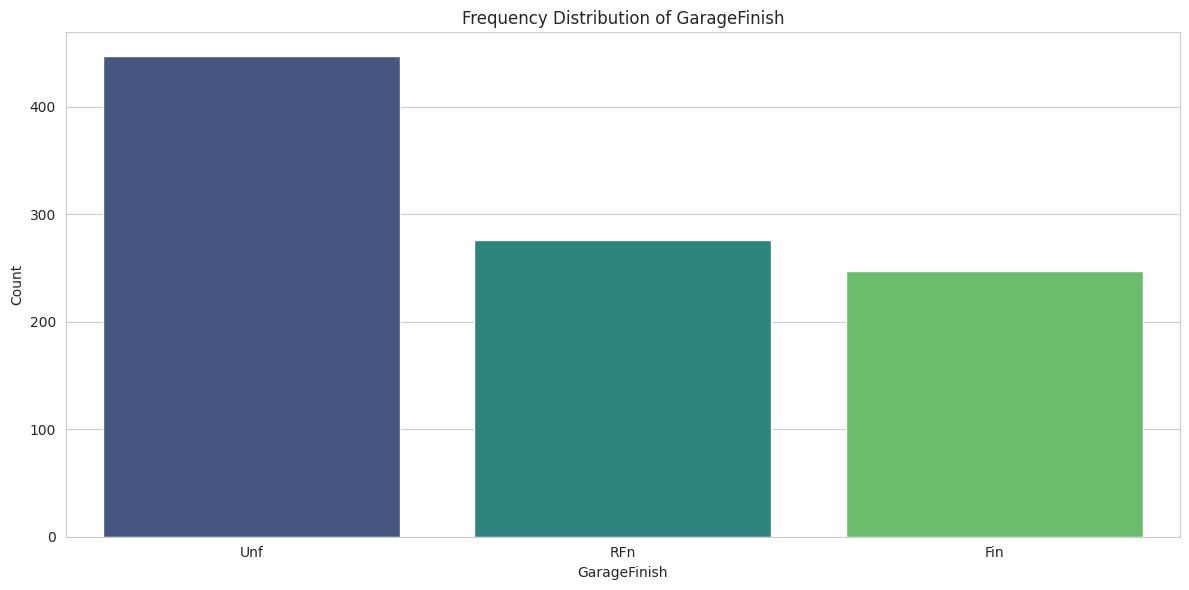

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


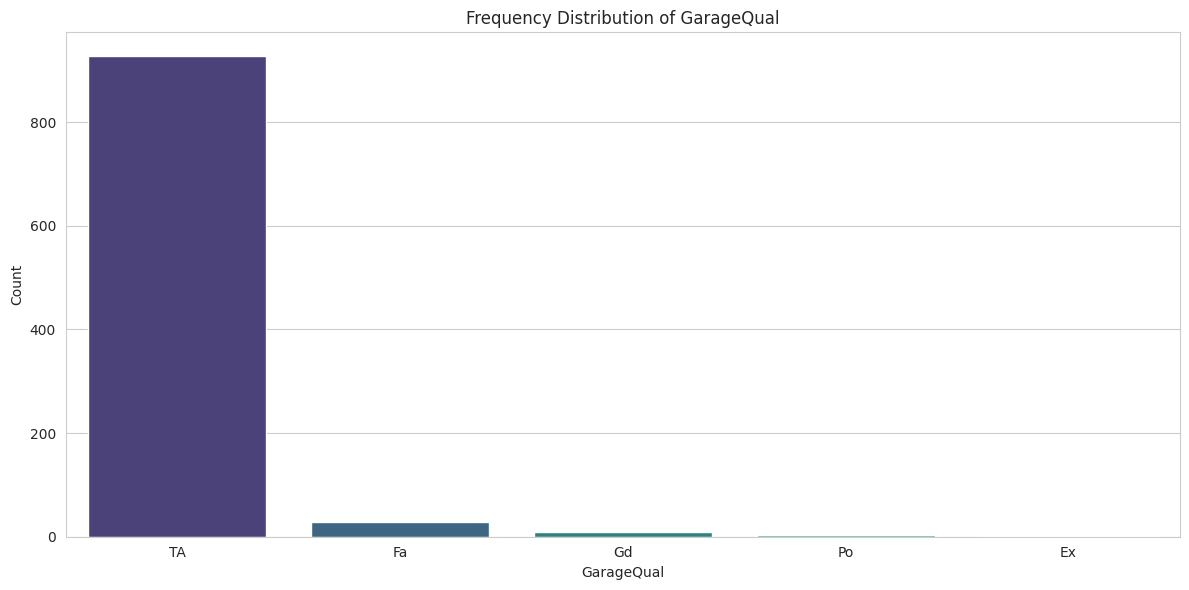

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


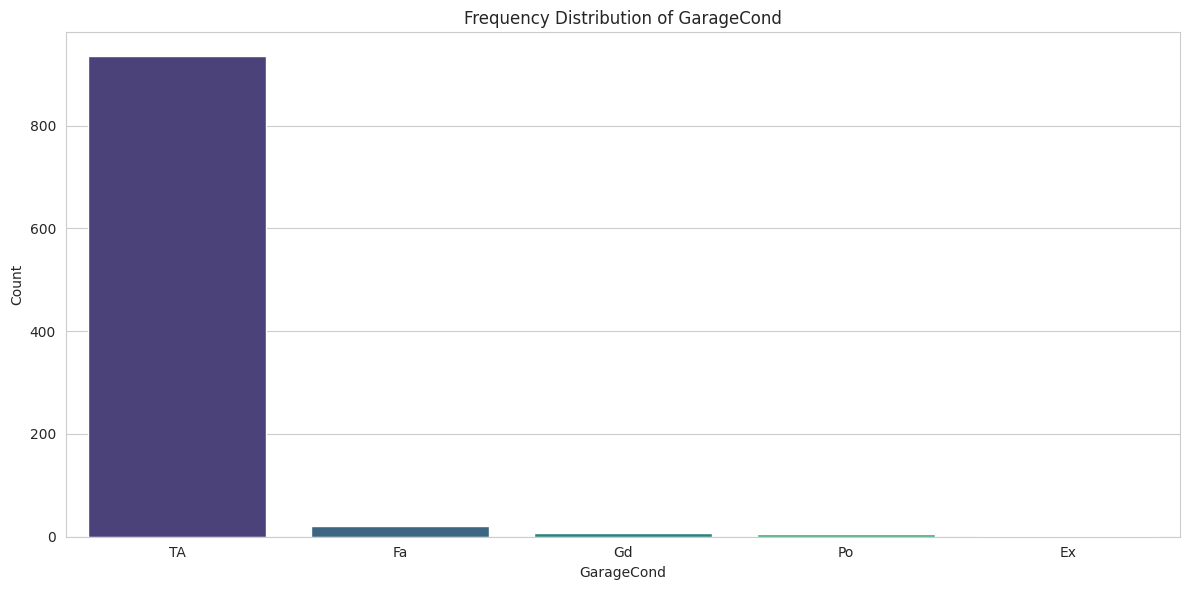

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


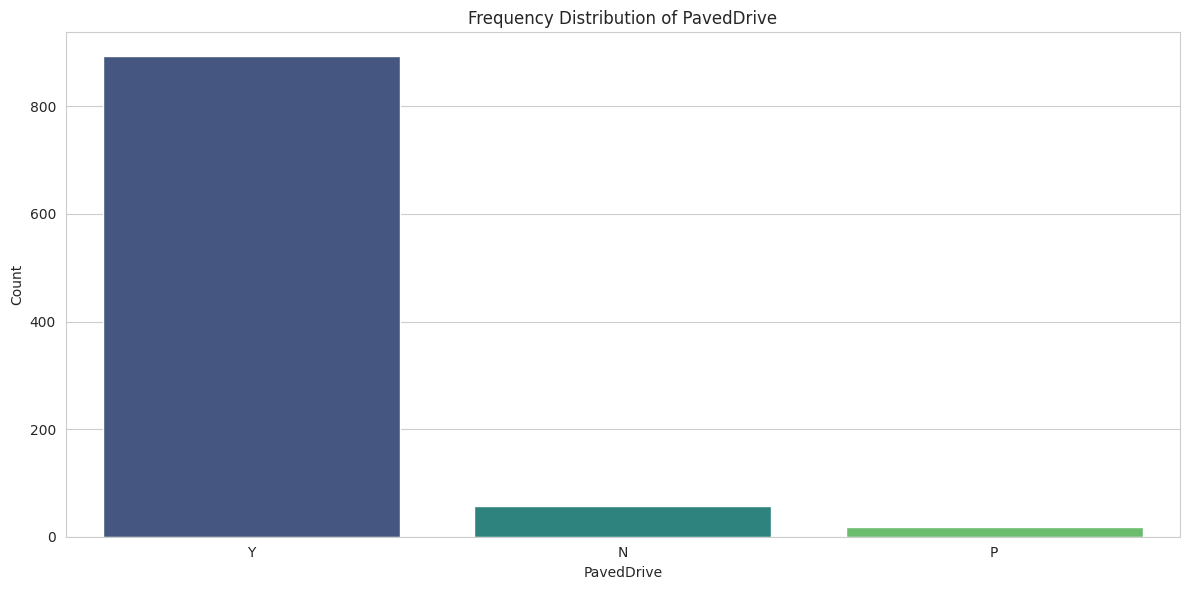

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


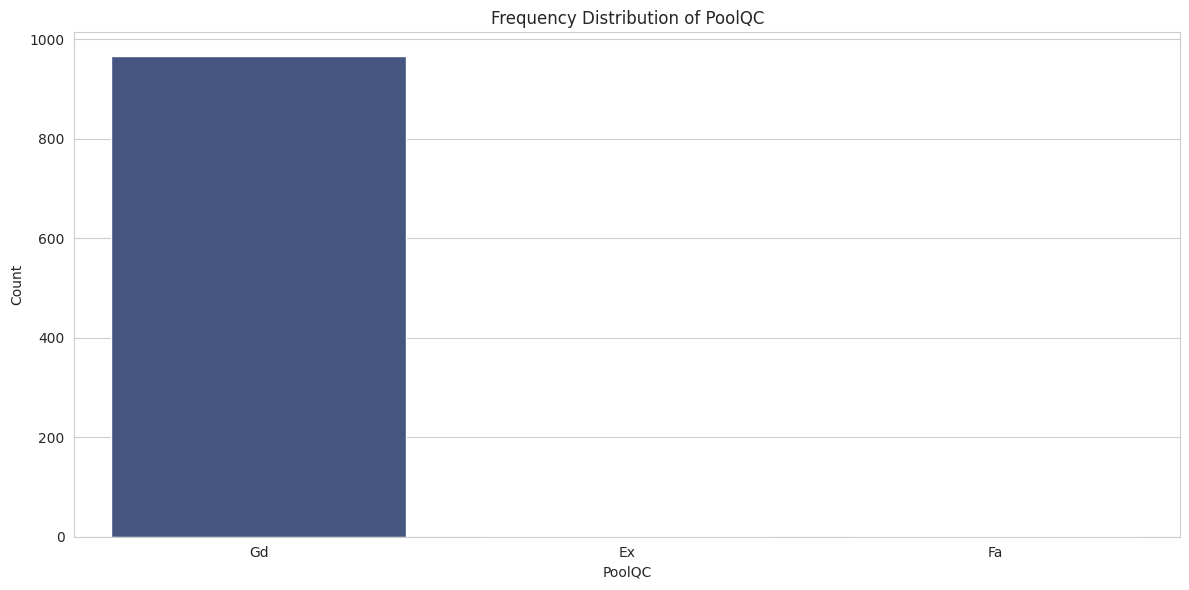

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


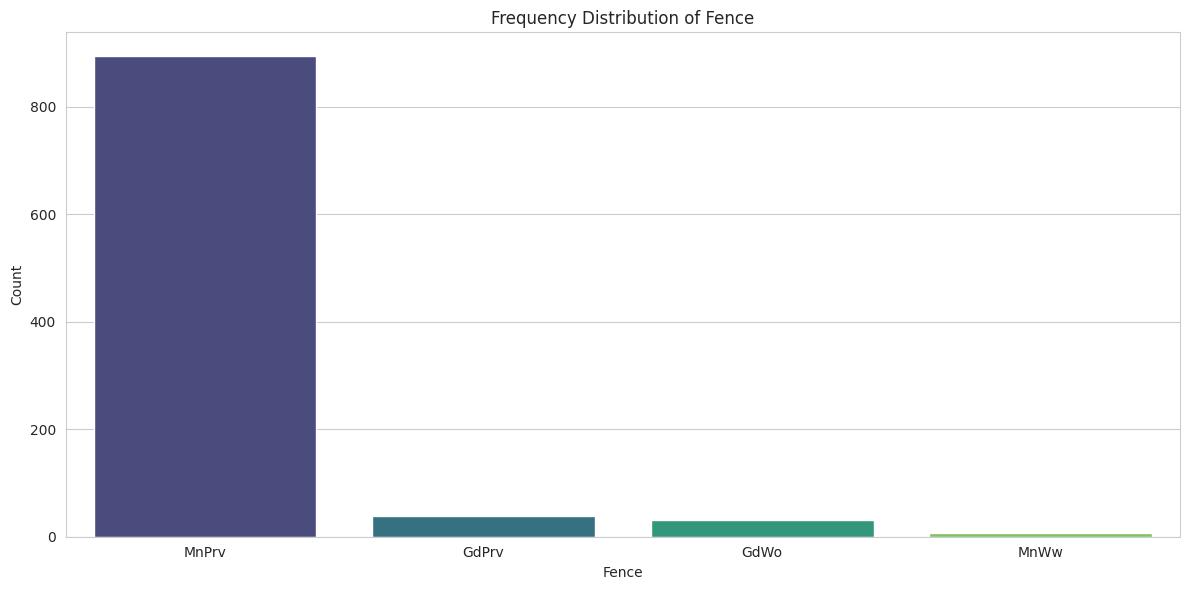

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


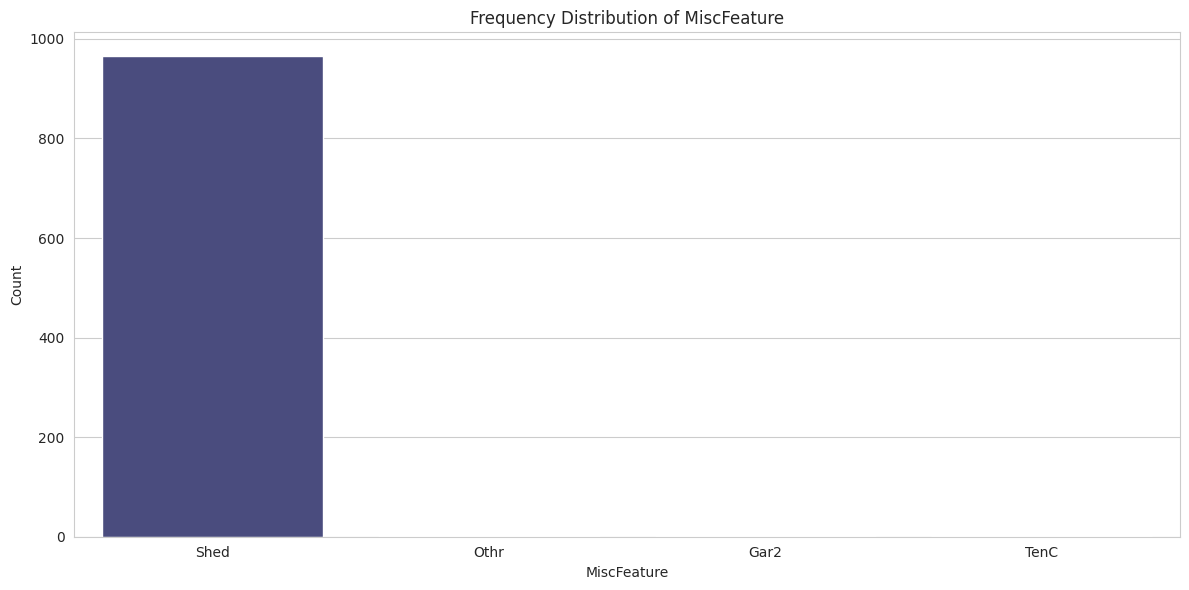

/tmp/ipython-input-1891758680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)


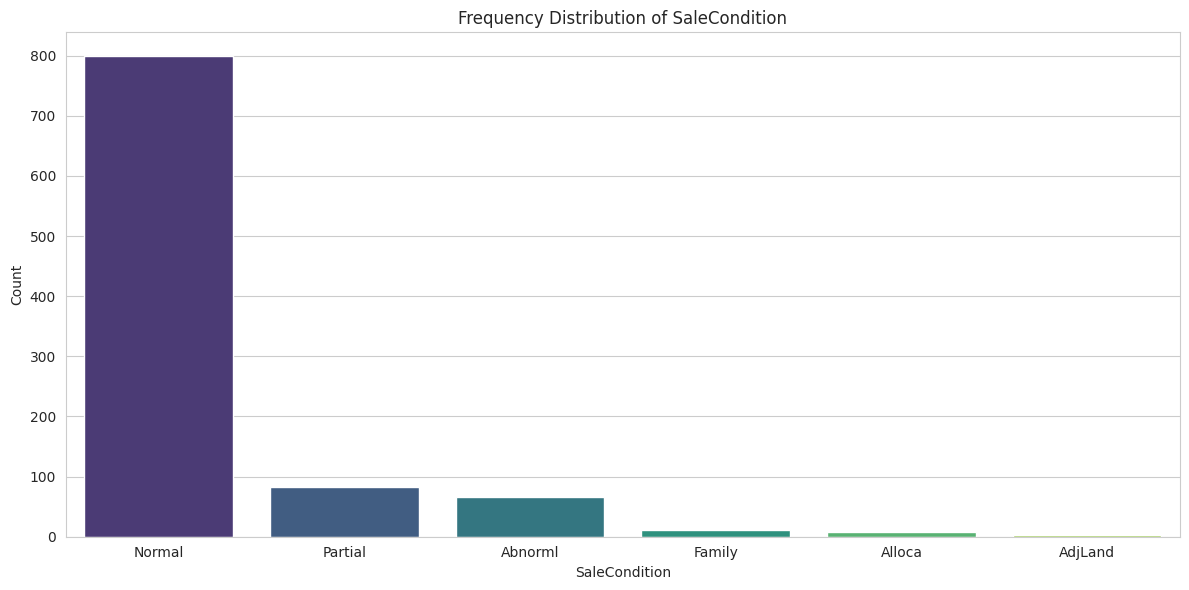

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = data.select_dtypes('object').columns.drop('Prop_Id', errors='ignore')

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().index)
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Correlation Matrix

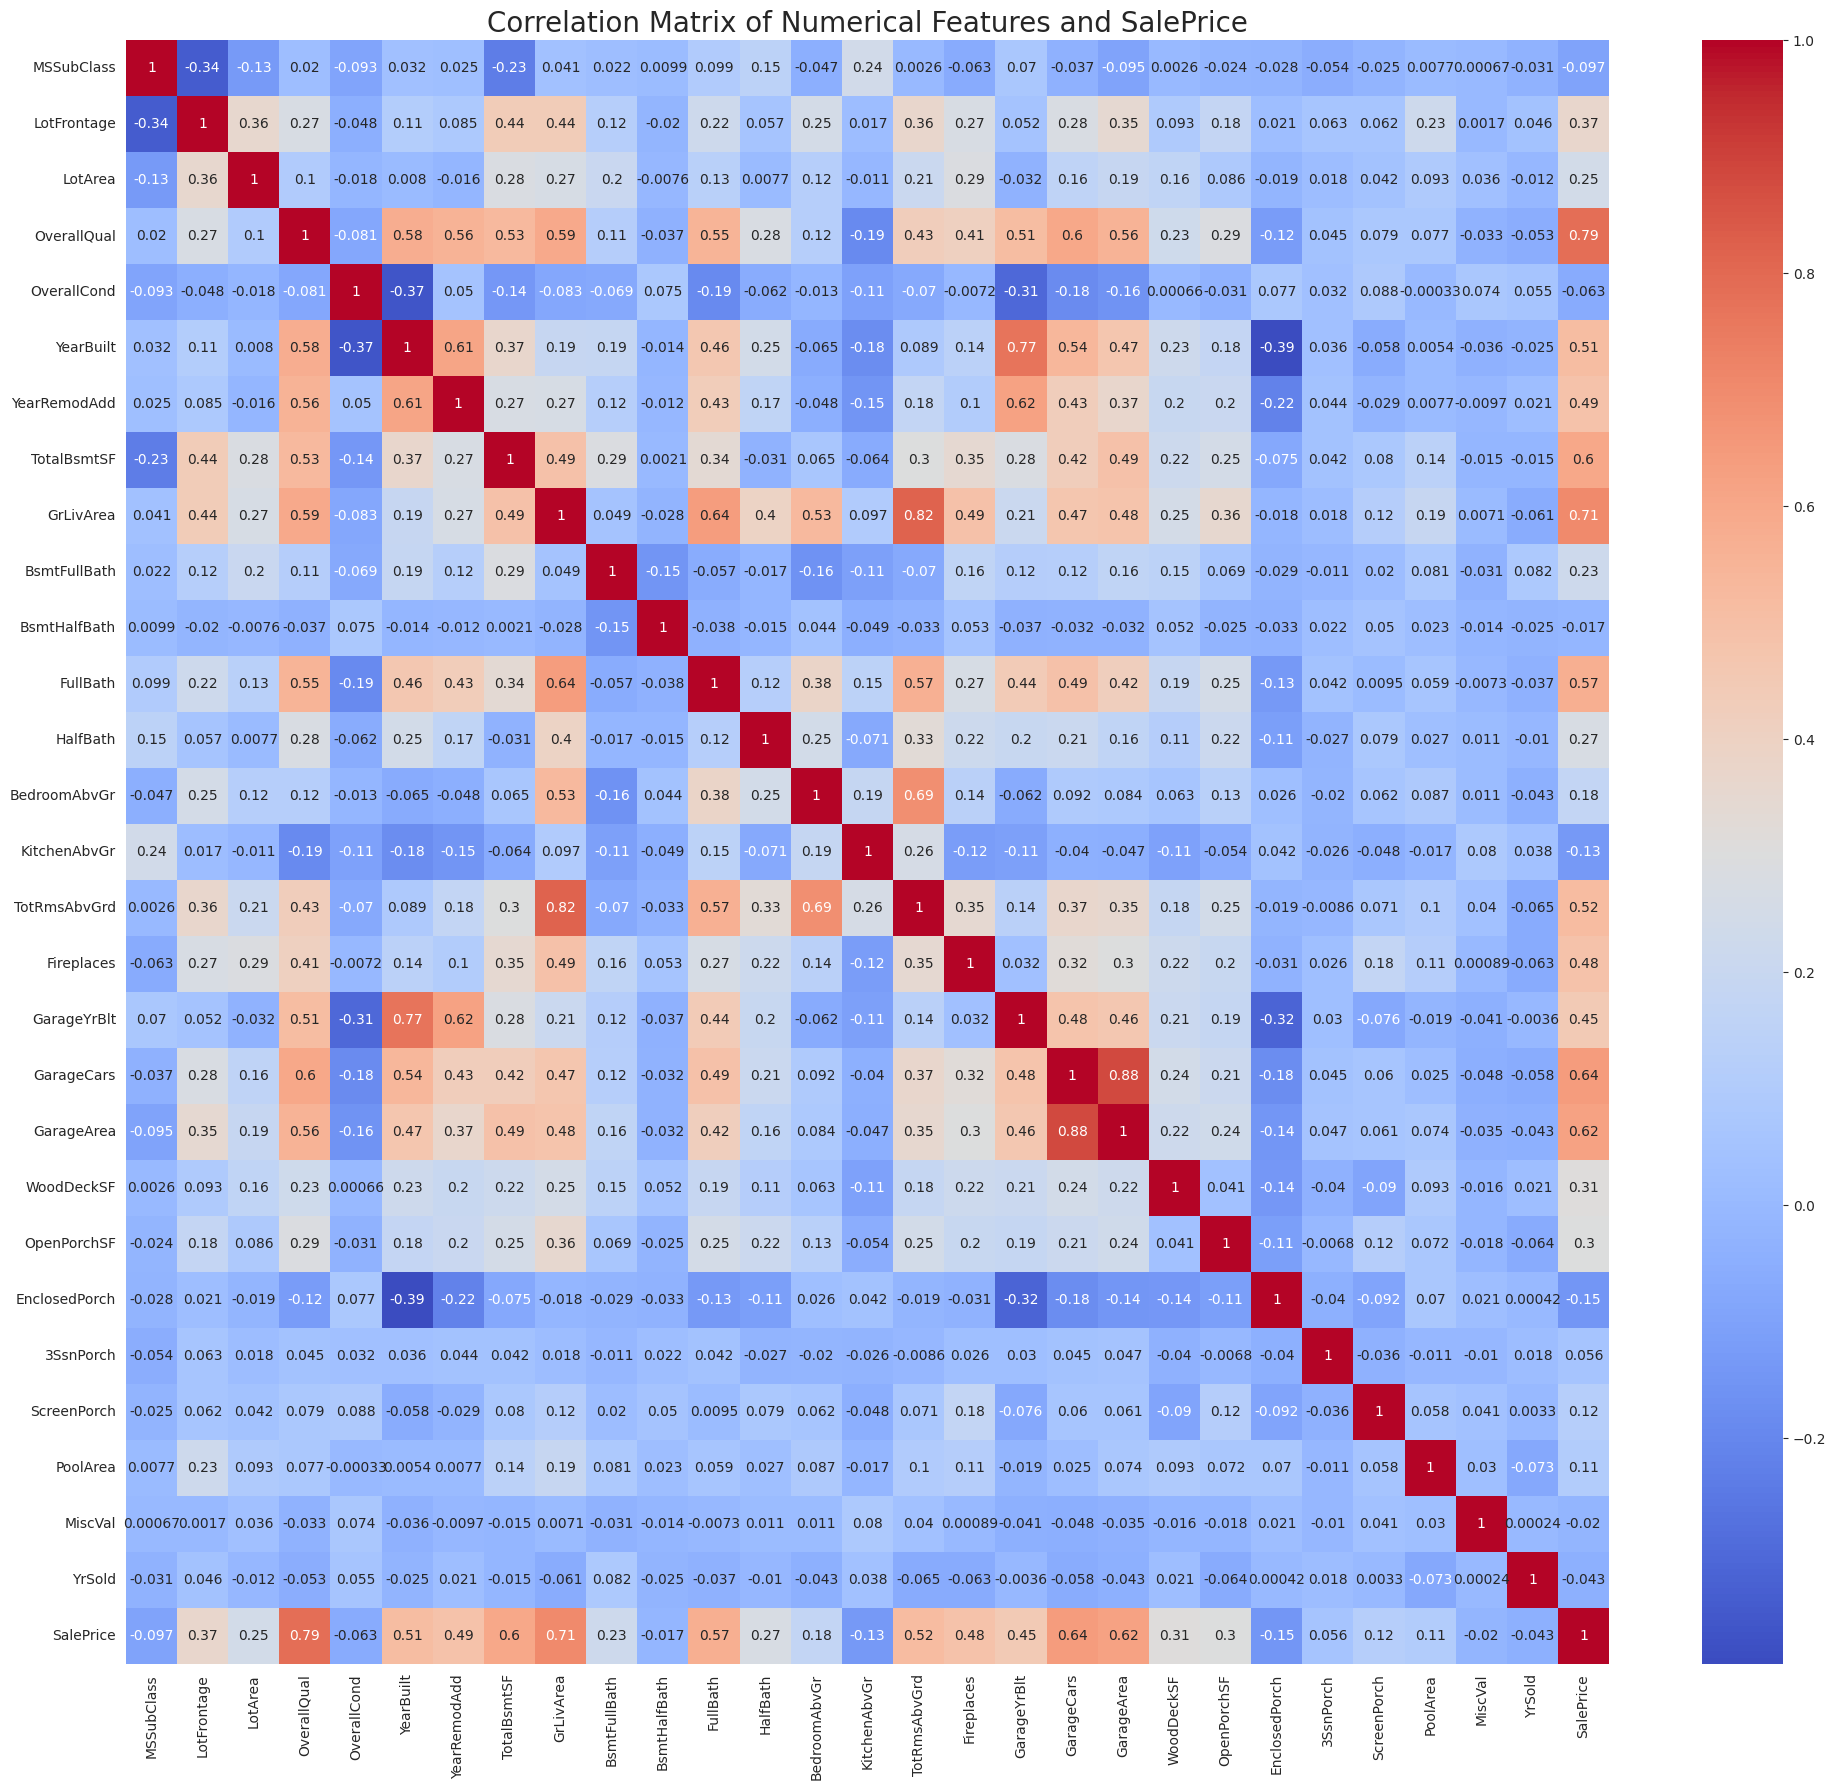

In [63]:
plt.figure(figsize=(20, 18))

correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features and SalePrice', fontsize=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Model Building


In [75]:
from sklearn.model_selection import train_test_split
import pandas as pd

X = data.drop('SalePrice', axis=1)
y = data['SalePrice']
categorical_cols = X.select_dtypes(include='object').columns

# Apply one-hot encoding to these identified categorical columns in X
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(776, 1179)
(194, 1179)
(776,)
(194,)


## Feature Scaling


In [76]:
from sklearn.preprocessing import StandardScaler

original_numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.drop('SalePrice', errors='ignore')

X_train_numerical = X_train[original_numerical_cols]
X_test_numerical = X_test[original_numerical_cols]

X_train_categorical = X_train.drop(columns=original_numerical_cols)
X_test_categorical = X_test.drop(columns=original_numerical_cols)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numerical)
X_test_scaled = scaler.transform(X_test_numerical)

# Convert scaled arrays back to DataFrames with original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=original_numerical_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=original_numerical_cols, index=X_test.index)

X_train = pd.concat([X_train_scaled, X_train_categorical], axis=1)
X_test = pd.concat([X_test_scaled, X_test_categorical], axis=1)

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mae)
print(mse)
print(r2)

20948.544064259862
1067156014.161761
0.8492633228502973
